In [1]:
!pip install --upgrade scikit-learn

     |████████████████████████████████| 13.4 MB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 90.0 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


#  Проект: Предсказание удовлетворенности сотрудников и их увольнения.

<div style="font-size: 20px; font-weight: bold;">Введение.</div>

Нам предоставили данные с характеристиками сотрудников компании. Наша задача — построить модели для предсказания уровня удовлетворенности сотрудников и вероятности их увольнения.

<div style="font-size: 20px; font-weight: bold;">Описание данных</div>
<p></p>
<div style="font-size: 16px; font-weight: bold;">train_job_satisfaction_rate.csv</div>

- `id` — уникальный идентификатор сотрудника
- `dept` — отдел, в котором работает сотрудник
- `level` — уровень занимаемой должности
- `workload` — уровень загруженности сотрудника
- `employment_years` — длительность работы в компании (в годах)
- `last_year_promo` — было ли повышение за последний год
- `last_year_violations` — нарушал ли сотрудник трудовой договор за последний год
- `supervisor_evaluation` — оценка качества работы сотрудника
- `salary` — ежемесячная зарплата сотрудника
- `job_satisfaction_rate` — уровень удовлетворённости сотрудника работой в компании (целевой признак)

<div style="font-size: 16px; font-weight: bold;">test_features.csv</div>

- Таблица с тестовыми данными - те же данные, что в предыдущем файле, но без целевого признака `job_satisfaction_rate`

<div style="font-size: 16px; font-weight: bold;">train_quit.csv</div>

- Тренировочная выборка для предсказания увольнения. Те же данные, что и в `train_job_satisfaction_rate.csv`


<div style="font-size: 16px; font-weight: bold;">test_quit.csv</div>

- Таблица с тестовыми данными - те же данные, что в предыдущем файле, но без целевого признака  `quit` . 

<div style="font-size: 16px; font-weight: bold;">test_target_quit.csv</div>

- Целевой признак  `test_quit`.


<h1>План исследования<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных." data-toc-modified-id="Подготовка-данных.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных.</a></span><ul class="toc-item"><li><span><a href="#Выводы." data-toc-modified-id="Выводы.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Выводы.</a></span></li></ul></li><li><span><a href="#Предобработка-данных." data-toc-modified-id="Предобработка-данных.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных.</a></span><ul class="toc-item"><li><span><a href="#Проверим-данные-на-дубликаты." data-toc-modified-id="Проверим-данные-на-дубликаты.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Проверим данные на дубликаты.</a></span></li><li><span><a href="#Выводы." data-toc-modified-id="Выводы.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Выводы.</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных." data-toc-modified-id="Исследовательский-анализ-данных.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных.</a></span><ul class="toc-item"><li><span><a href="#Взаимосвязи-признаков-job_satisfaction." data-toc-modified-id="Взаимосвязи-признаков-job_satisfaction.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взаимосвязи признаков <strong>job_satisfaction</strong>.</a></span></li><li><span><a href="#Определим-функци,-визуализирующие-информацию-о-признаках-датафрейма." data-toc-modified-id="Определим-функци,-визуализирующие-информацию-о-признаках-датафрейма.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Определим функци, визуализирующие информацию о признаках датафрейма.</a></span></li><li><span><a href="#Изучим-датафрейм--job_satisfaction." data-toc-modified-id="Изучим-датафрейм--job_satisfaction.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Изучим датафрейм  <strong>job_satisfaction</strong>.</a></span><ul class="toc-item"><li><span><a href="#Изучим-признак-dept-в-датафрейме-job_satisfaction." data-toc-modified-id="Изучим-признак-dept-в-датафрейме-job_satisfaction.-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Изучим признак <code>dept</code> в датафрейме <strong>job_satisfaction</strong>.</a></span></li><li><span><a href="#Изучим-признак-level-в-датафрейме-job_satisfaction." data-toc-modified-id="Изучим-признак-level-в-датафрейме-job_satisfaction.-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Изучим признак <code>level</code> в датафрейме <strong>job_satisfaction</strong>.</a></span></li><li><span><a href="#Изучим-признак-workload-в-датафрейме-job_satisfaction." data-toc-modified-id="Изучим-признак-workload-в-датафрейме-job_satisfaction.-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Изучим признак <code>workload</code> в датафрейме <strong>job_satisfaction</strong>.</a></span></li><li><span><a href="#Изучим-признак-employment_years-в-датафрейме-job_satisfaction." data-toc-modified-id="Изучим-признак-employment_years-в-датафрейме-job_satisfaction.-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Изучим признак <code>employment_years</code> в датафрейме <strong>job_satisfaction</strong>.</a></span></li><li><span><a href="#Изучим-признак-last_year_promo-в-датафрейме-job_satisfaction." data-toc-modified-id="Изучим-признак-last_year_promo-в-датафрейме-job_satisfaction.-3.3.5"><span class="toc-item-num">3.3.5&nbsp;&nbsp;</span>Изучим признак <code>last_year_promo</code> в датафрейме <strong>job_satisfaction</strong>.</a></span></li><li><span><a href="#Изучим-признак-last_year_violations-в-датафрейме-job_satisfaction." data-toc-modified-id="Изучим-признак-last_year_violations-в-датафрейме-job_satisfaction.-3.3.6"><span class="toc-item-num">3.3.6&nbsp;&nbsp;</span>Изучим признак <code>last_year_violations</code> в датафрейме <strong>job_satisfaction</strong>.</a></span></li><li><span><a href="#Изучим-признак-supervisor_evaluation-в-датафрейме-job_satisfaction." data-toc-modified-id="Изучим-признак-supervisor_evaluation-в-датафрейме-job_satisfaction.-3.3.7"><span class="toc-item-num">3.3.7&nbsp;&nbsp;</span>Изучим признак <code>supervisor_evaluation</code> в датафрейме <strong>job_satisfaction</strong>.</a></span></li><li><span><a href="#Изучим-признак-salary-в-датафрейме-job_satisfaction." data-toc-modified-id="Изучим-признак-salary-в-датафрейме-job_satisfaction.-3.3.8"><span class="toc-item-num">3.3.8&nbsp;&nbsp;</span>Изучим признак <code>salary</code> в датафрейме <strong>job_satisfaction</strong>.</a></span></li><li><span><a href="#Изучим-признак-job_satisfaction_rate-в-датафрейме-job_satisfaction." data-toc-modified-id="Изучим-признак-job_satisfaction_rate-в-датафрейме-job_satisfaction.-3.3.9"><span class="toc-item-num">3.3.9&nbsp;&nbsp;</span>Изучим признак <code>job_satisfaction_rate</code> в датафрейме <strong>job_satisfaction</strong>.</a></span></li></ul></li><li><span><a href="#Изучим-датафрейм-test_features." data-toc-modified-id="Изучим-датафрейм-test_features.-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Изучим датафрейм <strong>test_features</strong>.</a></span><ul class="toc-item"><li><span><a href="#Изучим-признак-dept-в-датафрейме-test_features." data-toc-modified-id="Изучим-признак-dept-в-датафрейме-test_features.-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Изучим признак <code>dept</code> в датафрейме <strong>test_features</strong>.</a></span></li><li><span><a href="#Изучим-признак-level-в-датафрейме-test_features." data-toc-modified-id="Изучим-признак-level-в-датафрейме-test_features.-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Изучим признак <code>level</code> в датафрейме <strong>test_features</strong>.</a></span></li><li><span><a href="#Изучим-признак-workload-в-датафрейме-test_features." data-toc-modified-id="Изучим-признак-workload-в-датафрейме-test_features.-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>Изучим признак <code>workload</code> в датафрейме <strong>test_features</strong>.</a></span></li><li><span><a href="#Изучим-признак-employment_years-в-датафрейме-test_features." data-toc-modified-id="Изучим-признак-employment_years-в-датафрейме-test_features.-3.4.4"><span class="toc-item-num">3.4.4&nbsp;&nbsp;</span>Изучим признак <code>employment_years</code> в датафрейме <strong>test_features</strong>.</a></span></li><li><span><a href="#Изучим-признак-last_year_promo-в-датафрейме-test_features." data-toc-modified-id="Изучим-признак-last_year_promo-в-датафрейме-test_features.-3.4.5"><span class="toc-item-num">3.4.5&nbsp;&nbsp;</span>Изучим признак <code>last_year_promo</code> в датафрейме <strong>test_features</strong>.</a></span></li><li><span><a href="#Изучим-признак-last_year_violations-в-датафрейме-test_features." data-toc-modified-id="Изучим-признак-last_year_violations-в-датафрейме-test_features.-3.4.6"><span class="toc-item-num">3.4.6&nbsp;&nbsp;</span>Изучим признак <code>last_year_violations</code> в датафрейме <strong>test_features</strong>.</a></span></li><li><span><a href="#Изучим-признак-supervisor_evaluation-в-датафрейме-test_features." data-toc-modified-id="Изучим-признак-supervisor_evaluation-в-датафрейме-test_features.-3.4.7"><span class="toc-item-num">3.4.7&nbsp;&nbsp;</span>Изучим признак <code>supervisor_evaluation</code> в датафрейме <strong>test_features</strong>.</a></span></li><li><span><a href="#Изучим-признак-salary-в-датафрейме-test_features." data-toc-modified-id="Изучим-признак-salary-в-датафрейме-test_features.-3.4.8"><span class="toc-item-num">3.4.8&nbsp;&nbsp;</span>Изучим признак <code>salary</code> в датафрейме <strong>test_features</strong>.</a></span></li></ul></li><li><span><a href="#Изучим-признак-job_satisfaction_rate-в-датафрейме-test_target." data-toc-modified-id="Изучим-признак-job_satisfaction_rate-в-датафрейме-test_target.-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Изучим признак <code>job_satisfaction_rate</code> в датафрейме <strong>test_target</strong>.</a></span></li><li><span><a href="#Изучим-датафрейм-train_quit." data-toc-modified-id="Изучим-датафрейм-train_quit.-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Изучим датафрейм <strong>train_quit</strong>.</a></span><ul class="toc-item"><li><span><a href="#Изучим-признак-dept-в-датафрейме-train_quit." data-toc-modified-id="Изучим-признак-dept-в-датафрейме-train_quit.-3.6.1"><span class="toc-item-num">3.6.1&nbsp;&nbsp;</span>Изучим признак <code>dept</code> в датафрейме <strong>train_quit</strong>.</a></span></li><li><span><a href="#Изучим-признак-level-в-датафрейме-train_quit." data-toc-modified-id="Изучим-признак-level-в-датафрейме-train_quit.-3.6.2"><span class="toc-item-num">3.6.2&nbsp;&nbsp;</span>Изучим признак <code>level</code> в датафрейме <strong>train_quit</strong>.</a></span></li><li><span><a href="#Изучим-признак-workload-в-датафрейме-train_quit." data-toc-modified-id="Изучим-признак-workload-в-датафрейме-train_quit.-3.6.3"><span class="toc-item-num">3.6.3&nbsp;&nbsp;</span>Изучим признак <code>workload</code> в датафрейме <strong>train_quit</strong>.</a></span></li><li><span><a href="#Изучим-признак-employment_years-в-датафрейме-train_quit." data-toc-modified-id="Изучим-признак-employment_years-в-датафрейме-train_quit.-3.6.4"><span class="toc-item-num">3.6.4&nbsp;&nbsp;</span>Изучим признак <code>employment_years</code> в датафрейме <strong>train_quit</strong>.</a></span></li><li><span><a href="#Изучим-признак-last_year_promo-в-датафрейме-train_quit." data-toc-modified-id="Изучим-признак-last_year_promo-в-датафрейме-train_quit.-3.6.5"><span class="toc-item-num">3.6.5&nbsp;&nbsp;</span>Изучим признак <code>last_year_promo</code> в датафрейме <strong>train_quit</strong>.</a></span></li><li><span><a href="#Изучим-признак-last_year_violations-в-датафрейме-train_quit." data-toc-modified-id="Изучим-признак-last_year_violations-в-датафрейме-train_quit.-3.6.6"><span class="toc-item-num">3.6.6&nbsp;&nbsp;</span>Изучим признак <code>last_year_violations</code> в датафрейме <strong>train_quit</strong>.</a></span></li><li><span><a href="#Изучим-признак-supervisor_evaluation-в-датафрейме-train_quit." data-toc-modified-id="Изучим-признак-supervisor_evaluation-в-датафрейме-train_quit.-3.6.7"><span class="toc-item-num">3.6.7&nbsp;&nbsp;</span>Изучим признак <code>supervisor_evaluation</code> в датафрейме <strong>train_quit</strong>.</a></span></li><li><span><a href="#Изучим-признак-salary-в-датафрейме-train_quit." data-toc-modified-id="Изучим-признак-salary-в-датафрейме-train_quit.-3.6.8"><span class="toc-item-num">3.6.8&nbsp;&nbsp;</span>Изучим признак <code>salary</code> в датафрейме <strong>train_quit</strong>.</a></span></li><li><span><a href="#Изучим-признак-quit-в-датафрейме-train_quit." data-toc-modified-id="Изучим-признак-quit-в-датафрейме-train_quit.-3.6.9"><span class="toc-item-num">3.6.9&nbsp;&nbsp;</span>Изучим признак <code>quit</code> в датафрейме <strong>train_quit</strong>.</a></span></li></ul></li><li><span><a href="#Изучим-признак-quit-в-датафрейме-test_target_quit." data-toc-modified-id="Изучим-признак-quit-в-датафрейме-test_target_quit.-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Изучим признак <code>quit</code> в датафрейме <strong>test_target_quit</strong>.</a></span></li><li><span><a href="#Выводы." data-toc-modified-id="Выводы.-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Выводы.</a></span></li></ul></li><li><span><a href="#Подготовка-данных." data-toc-modified-id="Подготовка-данных.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовка данных.</a></span></li><li><span><a href="#Обучение-моделей-для-предсказания-уровня-удовлетворённости-сотрудника." data-toc-modified-id="Обучение-моделей-для-предсказания-уровня-удовлетворённости-сотрудника.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Обучение моделей для предсказания уровня удовлетворённости сотрудника.</a></span><ul class="toc-item"><li><span><a href="#Выводы." data-toc-modified-id="Выводы.-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Выводы.</a></span></li></ul></li><li><span><a href="#Внимательнее-изучим-уволившихся-сотрудников." data-toc-modified-id="Внимательнее-изучим-уволившихся-сотрудников.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Внимательнее изучим уволившихся сотрудников.</a></span><ul class="toc-item"><li><span><a href="#Изучим-количество-увольнений-по-отделам." data-toc-modified-id="Изучим-количество-увольнений-по-отделам.-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Изучим количество увольнений по отделам.</a></span></li><li><span><a href="#Сравним-загруженность-уволившихся-сотрудников-с-оставшимися." data-toc-modified-id="Сравним-загруженность-уволившихся-сотрудников-с-оставшимися.-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Сравним загруженность уволившихся сотрудников с оставшимися.</a></span></li><li><span><a href="#Построим-портрет-уволившегося-сотрудника." data-toc-modified-id="Построим-портрет-уволившегося-сотрудника.-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Построим портрет уволившегося сотрудника.</a></span></li><li><span><a href="#Cравним-распределения-признака-job_satisfaction_rate-для-ушедших-и-оставшихся-сотрудников." data-toc-modified-id="Cравним-распределения-признака-job_satisfaction_rate-для-ушедших-и-оставшихся-сотрудников.-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Cравним распределения признака <code>job_satisfaction_rate</code> для ушедших и оставшихся сотрудников.</a></span></li><li><span><a href="#Выводы." data-toc-modified-id="Выводы.-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Выводы.</a></span></li></ul></li><li><span><a href="#Обучение-модели-для-предсказания-увольнения-сотрудника-из-компании." data-toc-modified-id="Обучение-модели-для-предсказания-увольнения-сотрудника-из-компании.-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Обучение модели для предсказания увольнения сотрудника из компании.</a></span><ul class="toc-item"><li><span><a href="#Выводы." data-toc-modified-id="Выводы.-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Выводы.</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Общий вывод</a></span><ul class="toc-item"><li><span><a href="#Выводы-и-предложения-для-бизнеса." data-toc-modified-id="Выводы-и-предложения-для-бизнеса.-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Выводы и предложения для бизнеса.</a></span></li></ul></li></ul></div>


## Подготовка данных.

In [2]:
!pip install phik -q
!pip install shap -q

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.preprocessing import LabelEncoder
import phik
import shap
from sklearn.metrics import make_scorer

warnings.filterwarnings('ignore')


# Установим константы
RANDOM_STATE = 117
TEST_SIZE = 0.25

In [3]:
# Загрузим данные
job_satisfaction = pd.read_csv('/datasets/train_job_satisfaction_rate.csv', decimal='.', sep=',')
test_features = pd.read_csv('/datasets/test_features.csv', decimal='.', sep=',')
test_target = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv', decimal='.', sep=',') 
train_quit = pd.read_csv('/datasets/train_quit.csv')
test_target_quit = pd.read_csv('/datasets/test_target_quit.csv')


In [4]:
# Определим функцию, выводящую общую информацию о датафрейме
def descr(df):
    display(df.head(5))
    display(df.info())
    display(df.describe())
    print(f'Количество дубликатов: {df.duplicated().sum()}')
    print(f'Количество пропусков: {df.isna().sum()}')

In [5]:
# Изучим данные job_satisfaction
descr(job_satisfaction)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


None

,id,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,544957.621000,3.718500,3.476500,33926.700000,0.533995
std,257883.104622,2.542513,1.008812,14900.703838,0.225327
min,100954.000000,1.000000,1.000000,12000.000000,0.030000
25%,322836.750000,2.000000,3.000000,22800.000000,0.360000
50%,534082.500000,3.000000,4.000000,30000.000000,0.560000
75%,771446.000000,6.000000,4.000000,43200.000000,0.710000
max,999521.000000,10.000000,5.000000,98400.000000,1.000000


Количество дубликатов: 0
Количество пропусков: id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64


- Имеются пропуски в столбцах  `dept` и `level`. Максимум 10 пропусков на 4000 записей (**0,25**%). Заполним их на этапе предобработки.

In [6]:
# Изучим данные test_features
descr(test_features)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


None

,id,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,552765.213500,3.666500,3.526500,34066.800000
std,253851.326129,2.537222,0.996892,15398.436729
min,100298.000000,1.000000,1.000000,12000.000000
25%,339052.000000,1.000000,3.000000,22800.000000
50%,550793.000000,3.000000,4.000000,30000.000000
75%,765763.750000,6.000000,4.000000,43200.000000
max,999029.000000,10.000000,5.000000,96000.000000


Количество дубликатов: 0
Количество пропусков: id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64


- Также имеются пропуски в столбцах `dept` и `level`. Максимум **3** пропуска на **2000** записей(**0,15%**). Также заполним их на этапе предобработки.

In [7]:
# Изучим данные test_target
descr(test_target)

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


None

,id,job_satisfaction_rate
count,2000.000000,2000.00000
mean,552765.213500,0.54878
std,253851.326129,0.22011
min,100298.000000,0.03000
25%,339052.000000,0.38000
50%,550793.000000,0.58000
75%,765763.750000,0.72000
max,999029.000000,1.00000


Количество дубликатов: 0
Количество пропусков: id                       0
job_satisfaction_rate    0
dtype: int64


In [8]:
# Изучим данные train_quit
descr(train_quit)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


None

,id,employment_years,supervisor_evaluation,salary
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,552099.283750,3.701500,3.474750,33805.800000
std,260158.031387,2.541852,1.004049,15152.415163
min,100222.000000,1.000000,1.000000,12000.000000
25%,327785.750000,2.000000,3.000000,22800.000000
50%,546673.000000,3.000000,4.000000,30000.000000
75%,781497.750000,6.000000,4.000000,43200.000000
max,999915.000000,10.000000,5.000000,96000.000000


Количество дубликатов: 0
Количество пропусков: id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64


In [9]:
# Изучим данные test_target_quit
descr(test_target_quit)

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


None

,id
count,2000.000000
mean,552765.213500
std,253851.326129
min,100298.000000
25%,339052.000000
50%,550793.000000
75%,765763.750000
max,999029.000000


Количество дубликатов: 0
Количество пропусков: id      0
quit    0
dtype: int64


### Выводы.

- В данных **train_satisfaction** и **test_features**  присутствуют пропуски в колонках `dept` и `level`. Их совсем немного, заполним их в пайплайне на этапе подготовки данных.
- В датафреймах нет явных дубликатов.

##  Предобработка данных.

### Проверим данные на дубликаты.

На предыдущем этапе мы увидели, что в датафреймах нет явных дубликатов. Проверим на неявные.

In [10]:
# Определим функцию, выводящую уникальные значения по столбцам
def unique(df):
    object_columns = df.select_dtypes(include=['object']).columns
    
    for column in object_columns:
        unique_values = df[column].value_counts()
        print(f"Уникальные значения в столбце '{column}':")
        for value, count in unique_values.items():
            print(f"{value} ({count})")
        print("")

In [11]:
# Выведем уникальные значения строковых столбцов train_satisfaction
unique(job_satisfaction)

Уникальные значения в столбце 'dept':
sales (1512)
technology (866)
purchasing (610)
marketing (550)
hr (456)

Уникальные значения в столбце 'level':
junior (1894)
middle (1744)
sinior (358)

Уникальные значения в столбце 'workload':
medium (2066)
low (1200)
high (734)

Уникальные значения в столбце 'last_year_promo':
no (3880)
yes (120)

Уникальные значения в столбце 'last_year_violations':
no (3441)
yes (559)



In [12]:
# Выведем уникальные значения строковых столбцов test_features 
unique(test_features)

Уникальные значения в столбце 'dept':
sales (763)
technology (455)
marketing (279)
purchasing (273)
hr (227)
  (1)

Уникальные значения в столбце 'level':
junior (974)
middle (854)
sinior (171)

Уникальные значения в столбце 'workload':
medium (1043)
low (593)
high (363)
  (1)

Уникальные значения в столбце 'last_year_promo':
no (1937)
yes (63)

Уникальные значения в столбце 'last_year_violations':
no (1738)
yes (262)



- В столбцах `dept` и  `level` по одной записи с пробелом вместо значения. Заменим их на **NaN**, чтобы далее заполнить в пайплайне с остальными пропусками на этапе подготовки данных.

In [13]:
# Обработаем пробелы
test_features['dept'] = test_features['dept'].replace(' ', np.nan)
test_features['workload'] = test_features['workload'].replace(' ', np.nan)

In [14]:
# Проверим результат
unique(test_features)

Уникальные значения в столбце 'dept':
sales (763)
technology (455)
marketing (279)
purchasing (273)
hr (227)

Уникальные значения в столбце 'level':
junior (974)
middle (854)
sinior (171)

Уникальные значения в столбце 'workload':
medium (1043)
low (593)
high (363)

Уникальные значения в столбце 'last_year_promo':
no (1937)
yes (63)

Уникальные значения в столбце 'last_year_violations':
no (1738)
yes (262)



In [15]:
# Выведем уникальные значения строковых столбцов train_quit 
unique(train_quit)

Уникальные значения в столбце 'dept':
sales (1438)
technology (928)
purchasing (588)
marketing (582)
hr (464)

Уникальные значения в столбце 'level':
junior (1949)
middle (1694)
sinior (357)

Уникальные значения в столбце 'workload':
medium (2118)
low (1208)
high (674)

Уникальные значения в столбце 'last_year_promo':
no (3887)
yes (113)

Уникальные значения в столбце 'last_year_violations':
no (3455)
yes (545)

Уникальные значения в столбце 'quit':
no (2872)
yes (1128)



In [16]:
# Выведем уникальные значения строковых столбцов test_target_quit 
unique(test_target_quit)

Уникальные значения в столбце 'quit':
no (1436)
yes (564)



### Выводы.

- В датафреймах не было дубликатов. 
- В датафрейме **test_features** в столбцах `dept` и  `level` было по одной записи с пробелом вместо значения. Мы заменили их на NaN, чтобы далее заполнить в пайплайне с остальными пропусками на этапе подготовки данных.

## Исследовательский анализ данных.

### Взаимосвязи признаков **job_satisfaction**.


Исследуем корреляции между признаками в датафрейме **job_satisfaction** и целевым признаком `job_satisfaction_rate`. Учитывая специфику наших данных (численные с ненормальным распределением + категориальные) будем использовать phik - корреляцию.

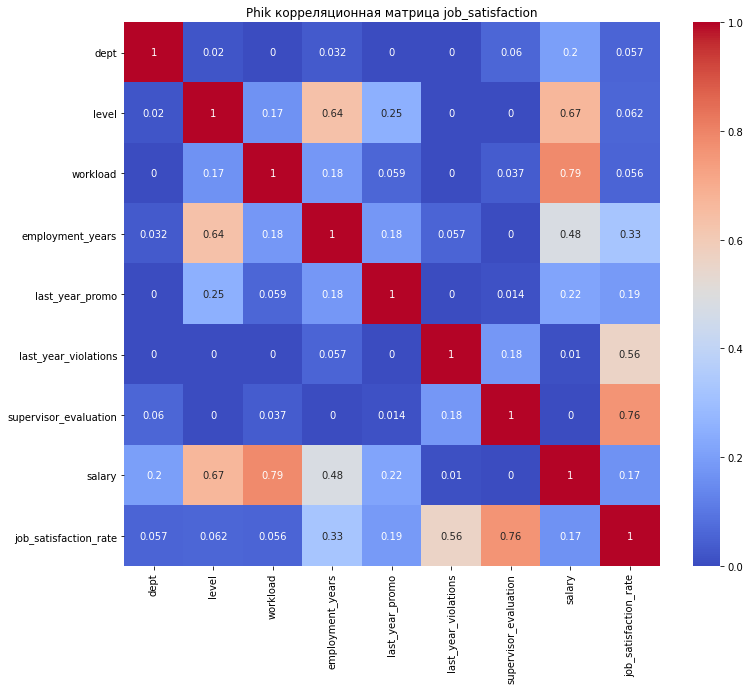

In [17]:
# Создаем копию данных
data = job_satisfaction.drop(columns=['id']).copy()

# Преобразуем категориальные данные в числовые
le = LabelEncoder()
data['level'] = le.fit_transform(data['level'].astype(str))
data['dept'] = le.fit_transform(data['dept'].astype(str))
data['workload'] = le.fit_transform(data['workload'].astype(str))
data['last_year_promo'] = le.fit_transform(data['last_year_promo'].astype(str))
data['last_year_violations'] = le.fit_transform(data['last_year_violations'].astype(str))

# Указываем числовые признаки
interval_cols = [ 'job_satisfaction_rate', 'employment_years', 'supervisor_evaluation', 'salary', 'level', 'workload', 'last_year_promo', 'last_year_violations']

# Вычисляем phik корреляцию
phik_corr = data.phik_matrix(interval_cols=interval_cols)

# Построим тепловую карту корреляций
plt.figure(figsize=(12, 10))
sns.heatmap(phik_corr, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Phik корреляционная матрица job_satisfaction')
plt.show()

 На основе новой Phik корреляционной матрицы, можно сделать следующие выводы:

- `job_satisfaction_rate` и `supervisor_evaluation` имеют корреляцию 0.76. Это показывает, что уровень удовлетворенности работой тесно связан с оценкой, которую сотрудник получает от своего руководителя.
- `employment_years` и `level` имеют корреляцию 0.64. Длительность работы в компании тесно связана с уровнем занимаемой должности.
- `salary` и `level` имеют корреляцию 0.67. Уровень должности логично имеет высокую положительную корреляцию с зарплатой.
- `salary` и `workload` имеют корреляцию 0.79. Нагрузка на работе имеет очень высокую положительную корреляцию с зарплатой.
- `job_satisfaction_rate` и `last_year_violations` имеют корреляцию 0.56. Это может указывать на то, что сотрудники, удовлетворенные своей работой, реже нарушают трудовой договор.

### Определим функци, визуализирующие информацию о признаках датафрейма.

In [18]:

def plot_data(df, column, title, xlabel, ylabel, columns_to_encode=None, encoding_lists=None, palette='Set2'):
    """
    Функция для построения графиков данных, определяет тип данных в столбце и вызывает соответствующую функцию для построения 
    графика.
    
    Аргументы:
    df (pd.DataFrame): Датафрейм с данными.
    column (str): Название столбца для визуализации.
    title (str): Заголовок графика.
    xlabel (str): Название оси X.
    ylabel (str): Название оси Y.
    columns_to_encode (list, optional): Список столбцов, для которых требуется декодирование значений.
    encoding_lists (list of lists, optional): Список списков с декодированными значениями для столбцов.
    palette (str, optional): Название палитры для цветов графика.
    """
    df_copy = df.copy()  # Создаем копию DataFrame

    if df_copy[column].dtype == 'object' or df_copy[column].nunique() <= 5:
        plot_categorical(df_copy, column, title, xlabel, ylabel, columns_to_encode, encoding_lists, palette)
    else:
        plot_numerical(df_copy, column, title, xlabel, ylabel, columns_to_encode, encoding_lists, palette)

def get_encoding_dict(column, columns_to_encode, encoding_lists):
    """
    Возвращает словарь декодирования для указанного столбца.
    
    Аргументы:
    column (str): Название столбца для визуализации.
    columns_to_encode (list): Список столбцов, для которых требуется декодирование значений.
    encoding_lists (list of lists): Список списков с декодированными значениями для столбцов.
    
    Возвращает:
    dict: Словарь декодирования для столбца или None, если декодирование не требуется.
    """
    if columns_to_encode and column in columns_to_encode and encoding_lists:
        index = columns_to_encode.index(column)
        return {i: encoding_lists[index][i] for i in range(len(encoding_lists[index]))}
    return None

def plot_categorical(df, column, title, xlabel, ylabel, columns_to_encode, encoding_lists, palette):
    """
    Функция для построения столбчатого графика для категориальных данных.
    
    Аргументы:
    df (pd.DataFrame): Датафрейм с данными.
    column (str): Название столбца для визуализации.
    title (str): Заголовок графика.
    xlabel (str): Название оси X.
    ylabel (str): Название оси Y.
    columns_to_encode (list, optional): Список столбцов, для которых требуется декодирование значений.
    encoding_lists (list of lists, optional): Список списков с декодированными значениями для столбцов.
    palette (str, optional): Название палитры для цветов графика.
    """
    value_map = get_encoding_dict(column, columns_to_encode, encoding_lists)
    if value_map:
        df[column] = df[column].map(value_map)
    
    counts = df[column].value_counts()
    total = counts.sum()

    unique_values = len(counts)
    height = min(unique_values * 1.6, 8)
    height = max(height, 1.6)  #Выставляем минимальную высоту
    
    fig, ax = plt.subplots(figsize=(15, height))
    bars = ax.barh(counts.index, counts.values, color=sns.color_palette(palette, unique_values), edgecolor='black')

    legend_labels = ['{}: {} ({:.1f}%)'.format(i, j, (j / total) * 100) for i, j in zip(counts.index, counts.values)]
    ax.legend(bars, legend_labels, title=column, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=1)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    ax.tick_params(axis='x', direction='inout', length=10, width=1, colors='black', pad=5, labelcolor='black')
    ax.xaxis.set_tick_params(width=1, size=10, color='black', pad=5)
    ax.tick_params(axis='y', pad=5)

    plt.show()

def plot_numerical(df, column, title, xlabel, ylabel, columns_to_encode, encoding_lists, palette):
    """
    Функция для построения гистограммы и коробки с усами для числовых данных.
    
    Аргументы:
    df (pd.DataFrame): Датафрейм с данными.
    column (str): Название столбца для визуализации.
    title (str): Заголовок графика.
    xlabel (str): Название оси X.
    ylabel (str): Название оси Y.
    columns_to_encode (list, optional): Список столбцов, для которых требуется декодирование значений.
    encoding_lists (list of lists, optional): Список списков с декодированными значениями для столбцов.
    palette (str, optional): Название палитры для цветов графика.
    """
    value_map = get_encoding_dict(column, columns_to_encode, encoding_lists)
    if value_map:
        df[column] = df[column].map(value_map)

    # Фильтрация выбросов
    #q_low = df[column].quantile(0.005)
    #q_hi = df[column].quantile(0.995)
    #df_filtered = df[(df[column] > q_low) & (df[column] < q_hi)]
    df_filtered = df
    fig = plt.figure(figsize=(14, 6))
    gs = plt.GridSpec(1, 3, width_ratios=[3, 0.5, 1])

    # Построение гистограммы
    ax0 = plt.subplot(gs[0])
    sns.histplot(df_filtered[column], ax=ax0, kde=True, color=sns.color_palette(palette, 1)[0])
    ax0.set_title(f'{title} - Гистограмма')
    ax0.set_xlabel(xlabel)
    ax0.set_ylabel(ylabel)

    # Построение диаграммы размаха (boxplot)
    lighter_color = sns.light_palette(sns.color_palette(palette, 1)[0], n_colors=3)[1]

    ax1 = plt.subplot(gs[2])
    sns.boxplot(y=df_filtered[column], ax=ax1, color=lighter_color,
                boxprops=dict(edgecolor='black', linewidth=0.7),
                whiskerprops=dict(color='black', linewidth=0.7),
                capprops=dict(color='black', linewidth=0.7),
                medianprops=dict(color='black', linewidth=0.7))
    ax1.set_title(f'{title} - Диаграмма размаха')
    ax1.set_ylabel(ylabel)

    plt.tight_layout()
    plt.show()

    # Вывод статистики
    median_value = df_filtered[column].median()
    print(f'median\t\t{median_value}')
    print(df_filtered[column].describe())


### Изучим датафрейм  **job_satisfaction**.

####  Изучим признак `dept` в датафрейме **job_satisfaction**.

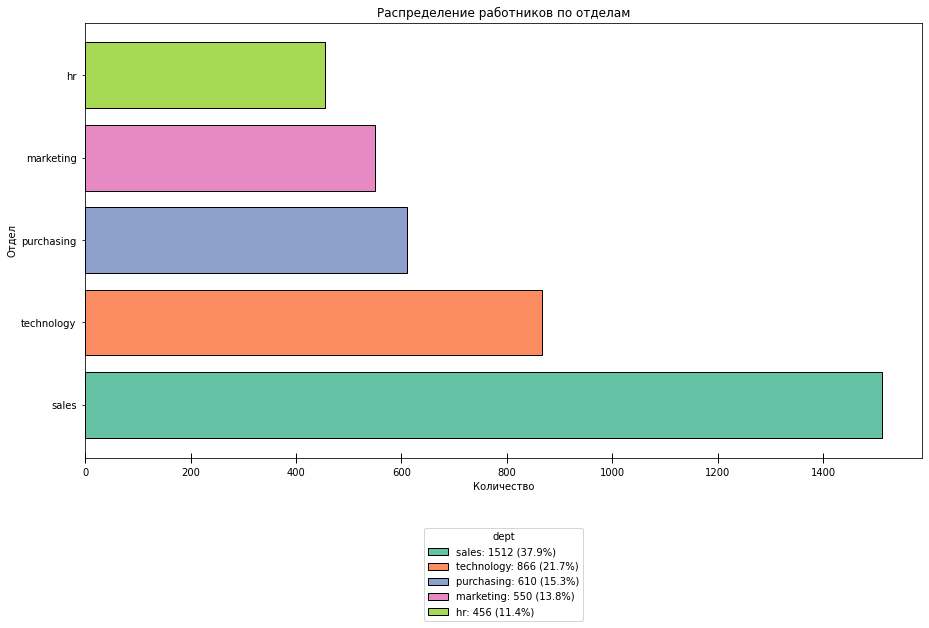

In [19]:
plot_data(job_satisfaction, 'dept', 'Распределение работников по отделам', 'Количество', 'Отдел')

Признак `dept` категориальный. Для подготовки данных потребуется его кодирование OneHotEncoder. Важно учитывать дисбаланс классов.

####  Изучим признак `level` в датафрейме **job_satisfaction**.

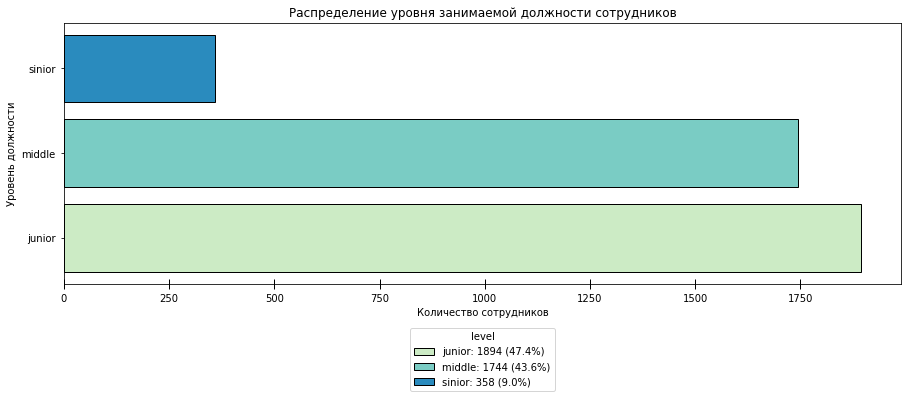

In [20]:
plot_data(job_satisfaction, 'level', 'Распределение уровня занимаемой должности сотрудников', 'Количество сотрудников', 'Уровень должности', palette='GnBu')

`level` также категориальный признак с дисбалансом классов.  Для подготовки данных потребуется его кодирование OrdinalEncoder.

####  Изучим признак `workload` в датафрейме **job_satisfaction**.

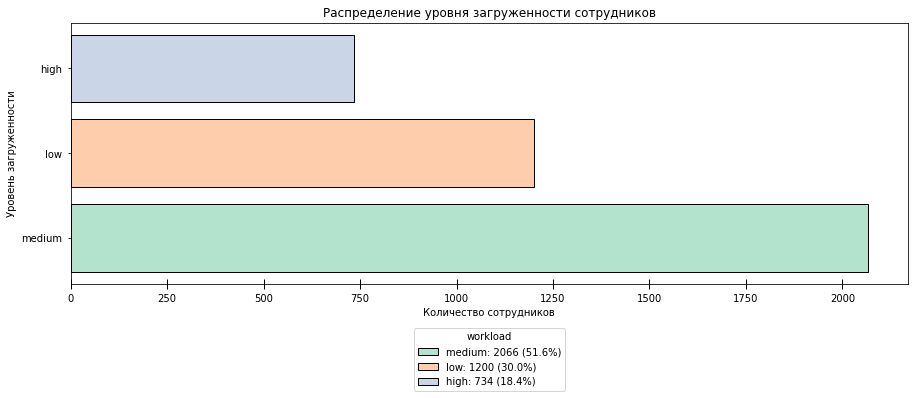

In [21]:
plot_data(job_satisfaction, 'workload', 'Распределение уровня загруженности сотрудников', 'Количество сотрудников', 'Уровень загруженности',  palette='Pastel2')

`workload` тоже категориальный признак с дисбалансом классов. Для подготовки данных потребуется его кодирование OrdinalEncoder.

####  Изучим признак `employment_years` в датафрейме **job_satisfaction**.

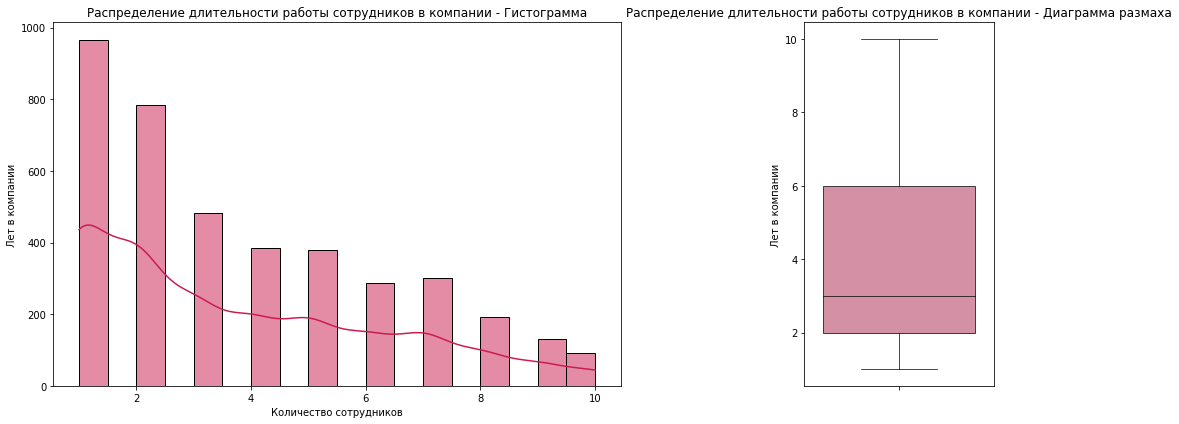

median		3.0
count    4000.000000
mean        3.718500
std         2.542513
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64


In [22]:
plot_data(job_satisfaction, 'employment_years', 'Распределение длительности работы сотрудников в компании', 'Количество сотрудников', 'Лет в компании',  palette='rocket')

`employment_years` числовой дискретный признак, среднее значение ~3.72 года, медиана - 3 года.

####  Изучим признак `last_year_promo` в датафрейме **job_satisfaction**.

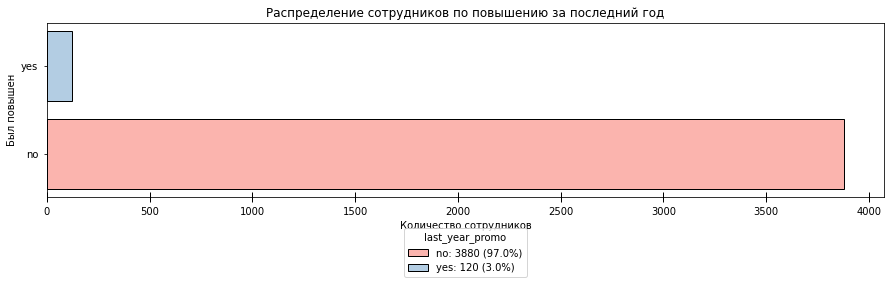

In [23]:
plot_data(job_satisfaction, 'last_year_promo', 'Распределение сотрудников по повышению за последний год', 'Количество сотрудников', 'Был повышен',  palette='Pastel1')

`last_year_promo`  бинарный признак. Для подготовки данных потребуется его кодирование OrdinalEncoder. Значительный дисбаланс классов, **97%** сотрудников в датасете повышения за последний год не получали.

####  Изучим признак `last_year_violations` в датафрейме **job_satisfaction**.

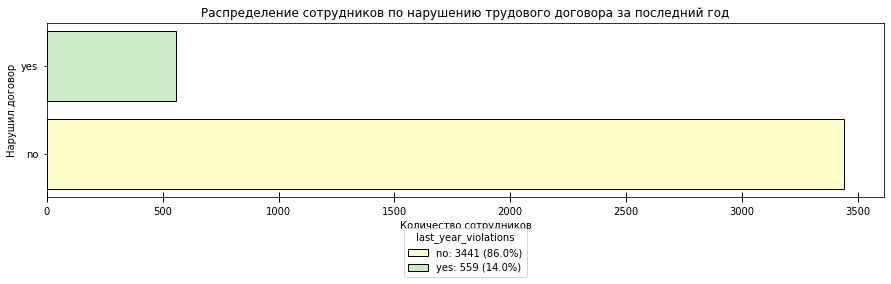

In [24]:
plot_data(job_satisfaction, 'last_year_violations', 'Распределение сотрудников по нарушению трудового договора за последний год', 'Количество сотрудников', 'Нарушил договор',  palette='Pastel1_r')

`last_year_violations` также бинарный признак со значительным дисбалансом классов - **86%** сотрудников в датасете не нарушали трудовой договор. Для подготовки данных потребуется его кодирование OrdinalEncoder.

####  Изучим признак `supervisor_evaluation` в датафрейме **job_satisfaction**.

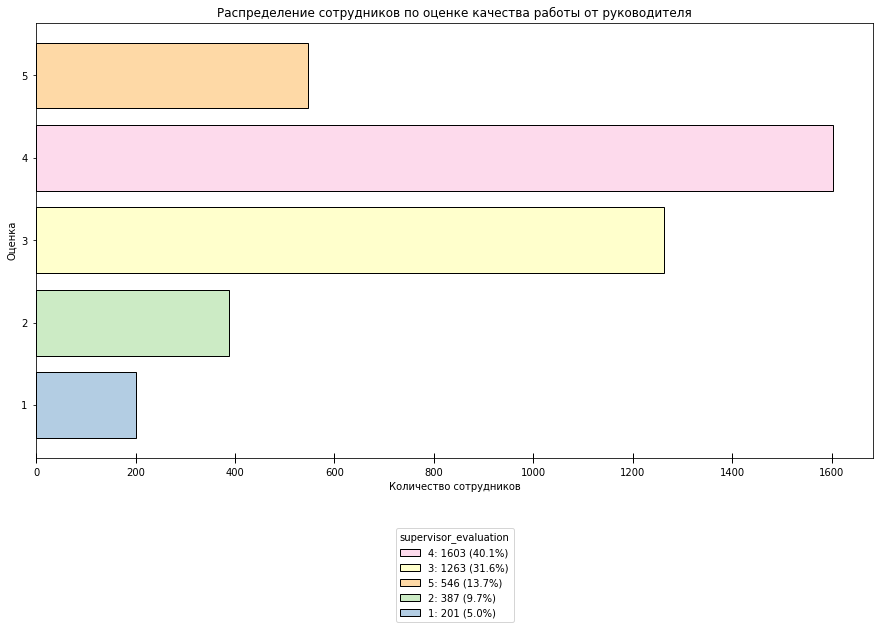

In [25]:
plot_data(job_satisfaction, 'supervisor_evaluation', 'Распределение сотрудников по оценке качества работы от руководителя', 'Количество сотрудников', 'Оценка', palette='Pastel1_r')

`supervisor_evaluation` числовой дискретный признак, распределение имеет перекос в сторону более высоких оценок.

####  Изучим признак `salary` в датафрейме **job_satisfaction**.

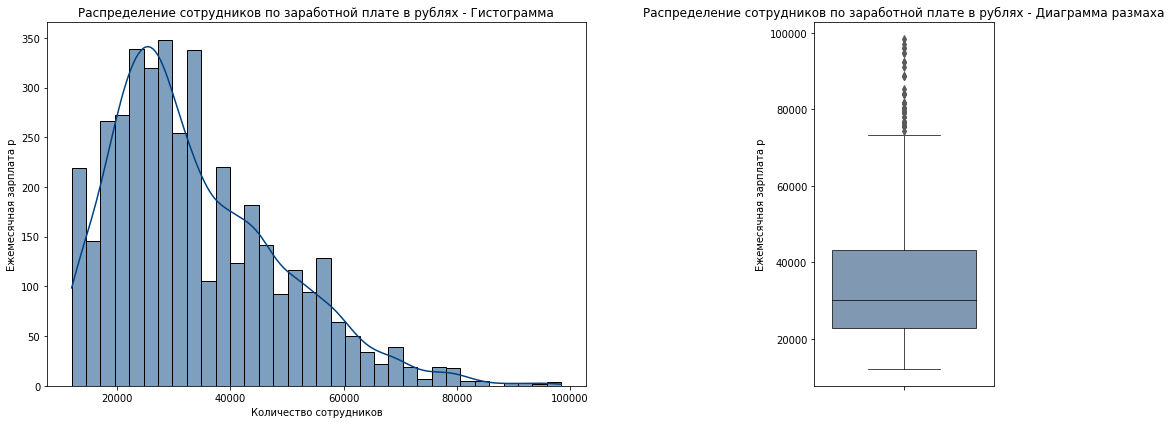

median		30000.0
count     4000.000000
mean     33926.700000
std      14900.703838
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      98400.000000
Name: salary, dtype: float64


In [26]:
plot_data(job_satisfaction, 'salary', 'Распределение сотрудников по заработной плате в рублях', 'Количество сотрудников', 'Ежемесячная зарплата р', palette='ocean')

`salary` числовой признак. Распределение заработной платы смещено влево, что указывает на наличие большего числа сотрудников с относительно низкой зарплатой. Медиана: **30 000** руб, среднее: **33 953.38** руб. При подготовке данных необходимо учитывать выбросы, так как максимальные значения значительно превышают медиану.

####  Изучим признак `job_satisfaction_rate` в датафрейме **job_satisfaction**.

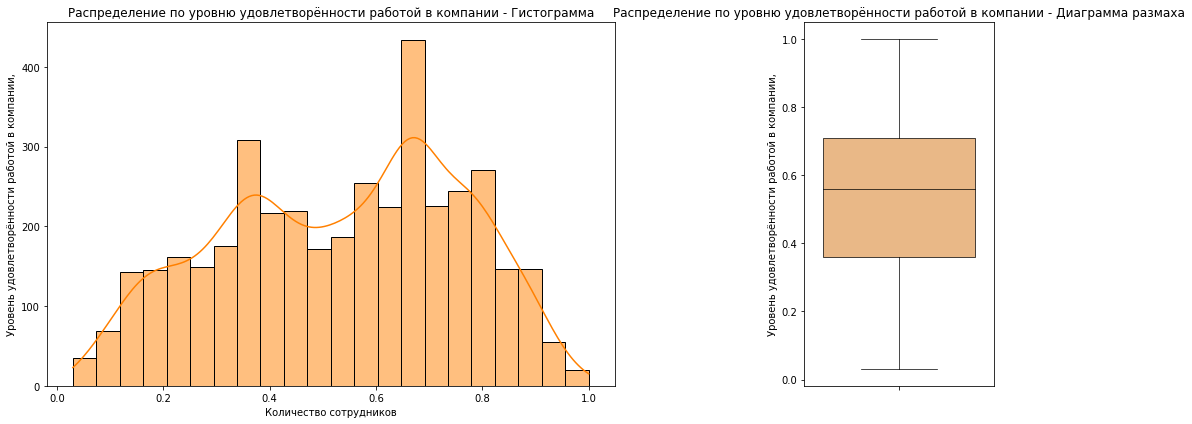

median		0.56
count    4000.000000
mean        0.533995
std         0.225327
min         0.030000
25%         0.360000
50%         0.560000
75%         0.710000
max         1.000000
Name: job_satisfaction_rate, dtype: float64


In [27]:
plot_data(job_satisfaction, 'job_satisfaction_rate', 'Распределение по уровню удовлетворённости работой в компании', 'Количество сотрудников', 'Уровень удовлетворённости работой в компании,',  palette='autumn')

`job_satisfaction_rate` - непрерывный числовой признак. Он является **целевым**. Распределение уровня удовлетворенности работой относительно симметричное с легким смещением вправо. Медиана: **0.56**, среднее ~ **0.53**.

###  Изучим датафрейм **test_features**.

####  Изучим признак `dept` в датафрейме **test_features**.

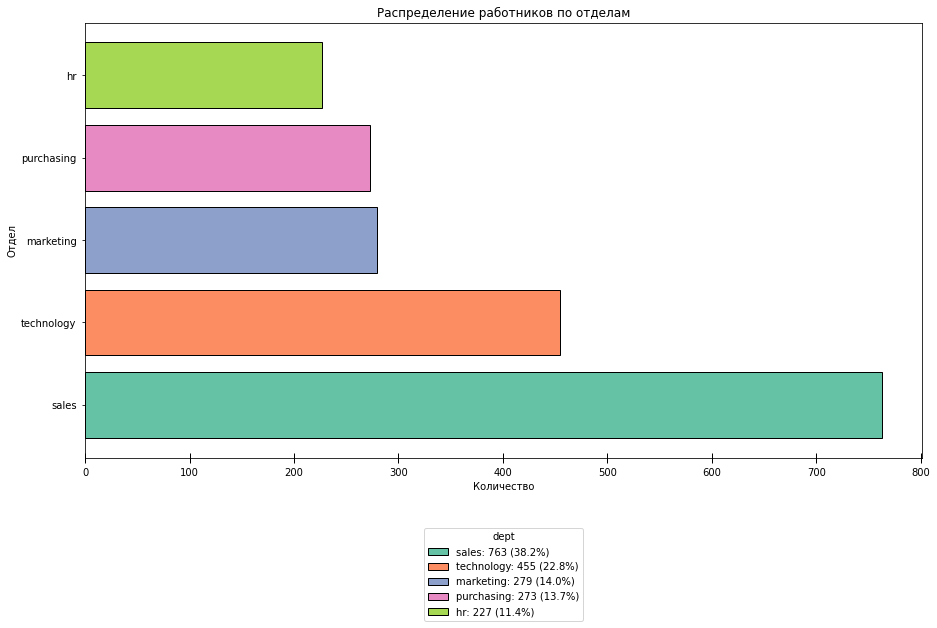

In [28]:
plot_data(test_features, 'dept', 'Распределение работников по отделам', 'Количество', 'Отдел')

- **Sales:** Пропорции сотрудников в отделе продаж практически совпадают (**37.8%** в тренировочных данных и **38.2%** в тестовых).
- **Technology:** Пропорции сотрудников в технологическом отделе немного выше в тестовых данных (**22.8%**) по сравнению с тренировочными (**21.7%**).
- **Purchasing:** Пропорции сотрудников в отделе закупок ниже в тестовых данных (**13.7%**) по сравнению с тренировочными (**15.3%**).
- **Marketing:** Пропорции сотрудников в отделе маркетинга практически идентичны (**13.8%** в тренировочных данных и **13.9%** в тестовых).
- **HR:** Пропорции сотрудников в HR отделе одинаковы в обеих выборках (**11.4%**).

Распределение сотрудников по отделам в тестовых данных близко к распределению в тренировочных данных, что говорит о схожести выборок и отсутствии сильных дисбалансов между ними.

####  Изучим признак `level` в датафрейме **test_features**.

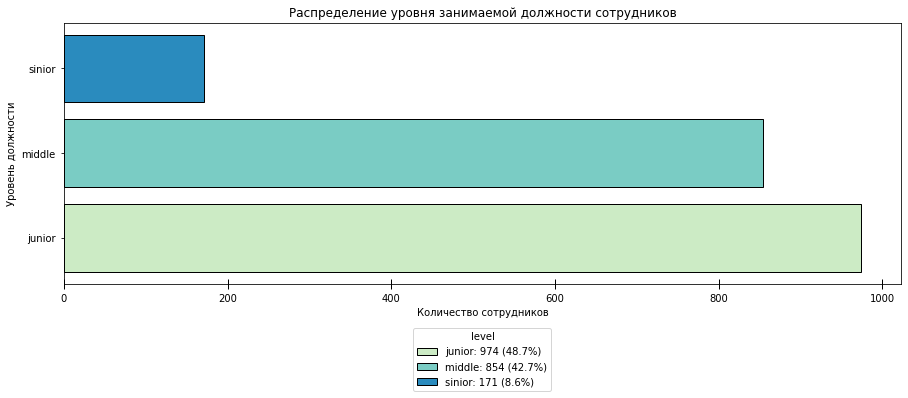

In [29]:
plot_data(test_features, 'level', 'Распределение уровня занимаемой должности сотрудников', 'Количество сотрудников', 'Уровень должности', palette='GnBu')

- **Junior:** Пропорции сотрудников на младших должностях близки в тренировочных и тестовых данных (**47.3%** и **48.7%** соответственно).
- **Middle:** Пропорции сотрудников на средних должностях также очень схожи (**43.7%** в тренировочных и **42.8%** в тестовых данных).
- **Senior:** Пропорции сотрудников на старших должностях почти идентичны (**9.0%** в тренировочных и **8.6%** в тестовых данных).

Таким образом, распределение сотрудников по уровням должностей в тестовых данных практически совпадает с распределением в тренировочных данных, что свидетельствует о схожести выборок и отсутствии значительных дисбалансов.

####  Изучим признак `workload` в датафрейме **test_features**.

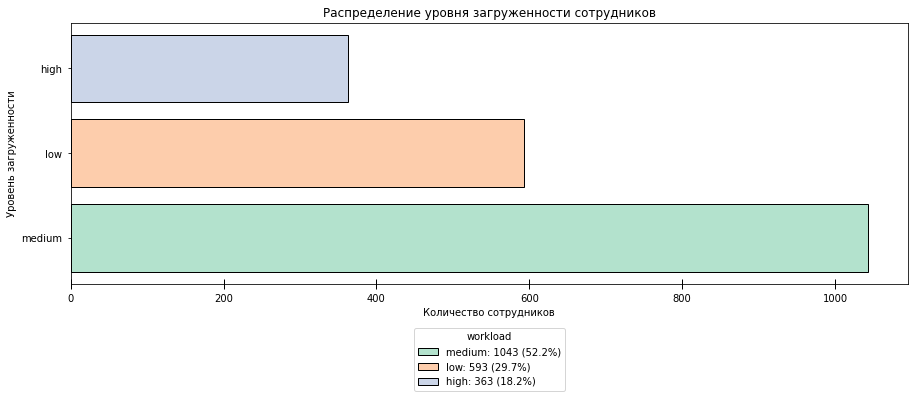

In [30]:
plot_data(test_features, 'workload', 'Распределение уровня загруженности сотрудников', 'Количество сотрудников', 'Уровень загруженности', palette='Pastel2')

- **High:** Пропорции сотрудников с высокой загруженностью близки в тренировочных и тестовых данных (**17.9%** и **18.2%** соответственно).
- **Medium:** Пропорции сотрудников со средней загруженностью почти совпадают (**51.2%** в тренировочных и **52.1%** в тестовых данных).
- **Low:** Пропорции сотрудников с низкой загруженностью также очень схожи (**31.0%** в тренировочных и **29.7%** в тестовых данных).

Распределение уровней загруженности в тестовых данных соответствует распределению в тренировочных данных, что свидетельствует о согласованности выборок и отсутствии значительных дисбалансов.

####  Изучим признак `employment_years` в датафрейме **test_features**.

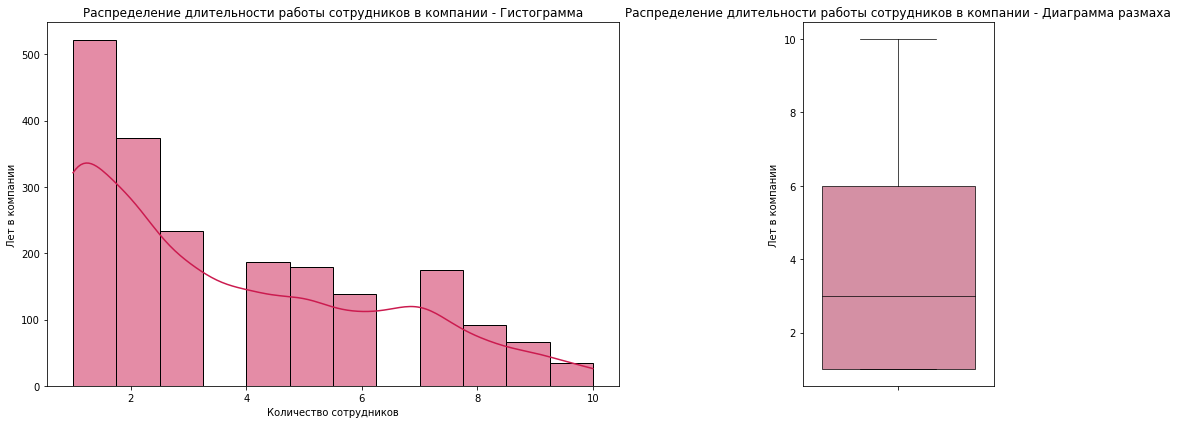

median		3.0
count    2000.000000
mean        3.666500
std         2.537222
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64


In [31]:
plot_data(test_features, 'employment_years', 'Распределение длительности работы сотрудников в компании', 'Количество сотрудников', 'Лет в компании',  palette='rocket')

Распределение `длительности работы` сотрудников в тестовых данных соответствует распределению в тренировочных данных.

####  Изучим признак `last_year_promo` в датафрейме **test_features**.

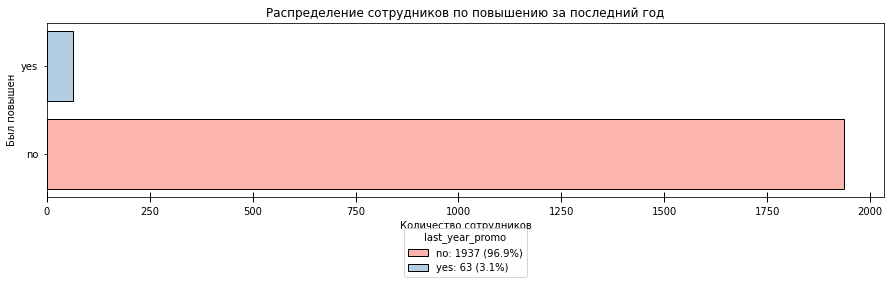

In [32]:
plot_data(test_features, 'last_year_promo', 'Распределение сотрудников по повышению за последний год', 'Количество сотрудников', 'Был повышен',  palette='Pastel1')

Распределение по признаку `повышения за последний год` в тестовых данных также соответствует распределению в тренировочных данных.

####  Изучим признак `last_year_violations` в датафрейме **test_features**.

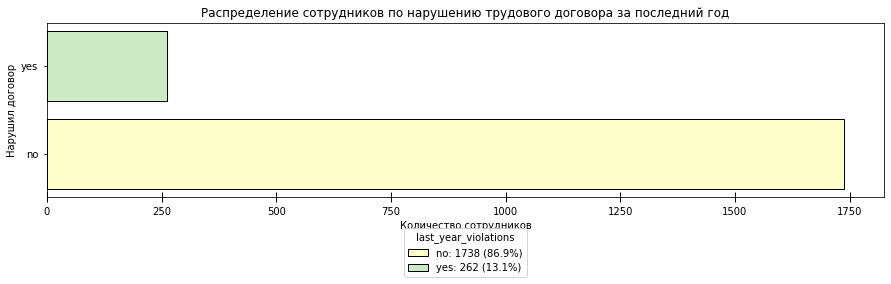

In [33]:
plot_data(test_features, 'last_year_violations', 'Распределение сотрудников по нарушению трудового договора за последний год', 'Количество сотрудников', 'Нарушил договор',  palette='Pastel1_r')

- **Не нарушил:** Пропорции сотрудников, не нарушивших трудовой договор, немного выше в тестовых данных (**86.9%**) по сравнению с тренировочными (**82.3%**).
- **Нарушил:** Пропорции сотрудников, нарушивших трудовой договор, несколько ниже в тестовых данных (**13.1%**) по сравнению с тренировочными (**17.7%**).

Распределение по признаку `нарушения трудового договора за последний год` в тестовых данных немного отличается от распределения в тренировочных данных но, разница не является значительной.

####  Изучим признак `supervisor_evaluation` в датафрейме **test_features**.

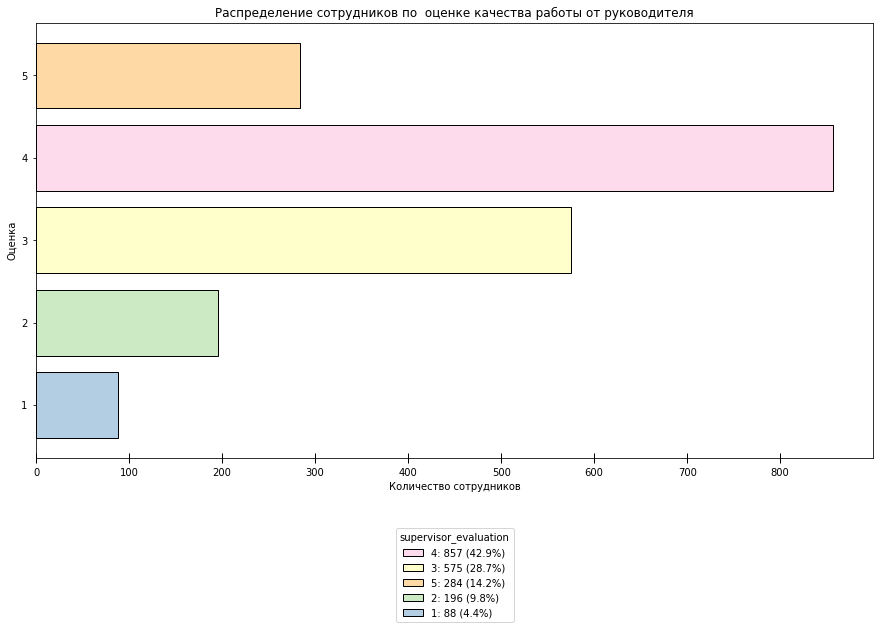

In [34]:
plot_data(test_features, 'supervisor_evaluation', 'Распределение сотрудников по  оценке качества работы от руководителя', 'Количество сотрудников', 'Оценка',  palette='Pastel1_r')


- **Оценка 1:** Пропорции сотрудников с оценкой 1 также близки (**5.0%** в тренировочных и **4.4%** в тестовых данных).
- **Оценка 2:** Пропорции сотрудников с оценкой 2 практически одинаковы в обеих выборках (**9.7%** в тренировочных и **9.8%** в тестовых данных).
- **Оценка 3:** Пропорции сотрудников с оценкой 3 немного ниже в тестовых данных (**28.8%**) по сравнению с тренировочными (**31.6%**).
- **Оценка 4:** Пропорции сотрудников с оценкой 4 близки в тренировочных и тестовых данных (**40.0%** и **42.8%** соответственно).
- **Оценка 5:** Пропорции сотрудников с оценкой 5 немного выше в тестовых данных (**14.2%**) по сравнению с тренировочными (**13.6%**).


Распределение `оценок качества работы от руководителя` в тестовых данных соответствует распределению в тренировочных данных с небольшими отличиями.

####  Изучим признак `salary` в датафрейме **test_features**.

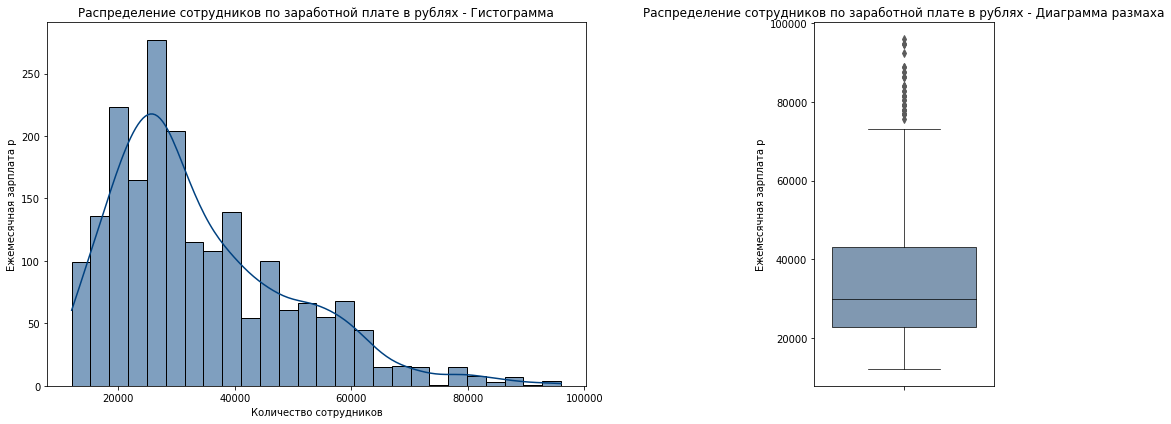

median		30000.0
count     2000.000000
mean     34066.800000
std      15398.436729
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64


In [35]:
plot_data(test_features, 'salary', 'Распределение сотрудников по заработной плате в рублях', 'Количество сотрудников', 'Ежемесячная зарплата р',  palette='ocean')

Распределение `заработной платы` в тестовых данных в целом соответствует распределению в тренировочных данных с небольшими отклонениями. 

###  Изучим признак `job_satisfaction_rate` в датафрейме **test_target**.

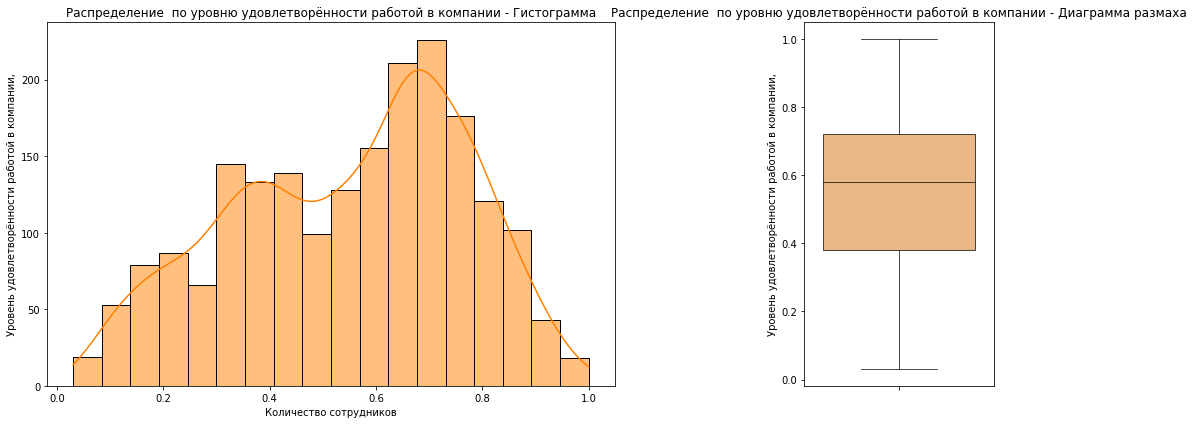

median		0.58
count    2000.00000
mean        0.54878
std         0.22011
min         0.03000
25%         0.38000
50%         0.58000
75%         0.72000
max         1.00000
Name: job_satisfaction_rate, dtype: float64


In [36]:
plot_data(test_target, 'job_satisfaction_rate', 'Распределение  по уровню удовлетворённости работой в компании', 'Количество сотрудников', 'Уровень удовлетворённости работой в компании,', palette='autumn')

Распределение уровня `удовлетворённости работой` в тестовых данных соответствует распределению в тренировочных данных с небольшими отличиями, что свидетельствует о согласованности выборок и отсутствии значительных дисбалансов. Среднее значение и медиана уровня удовлетворённости немного выше в тестовых данных по сравнению с тренировочными.

###  Изучим датафрейм **train_quit**.

####  Изучим признак `dept` в датафрейме **train_quit**.

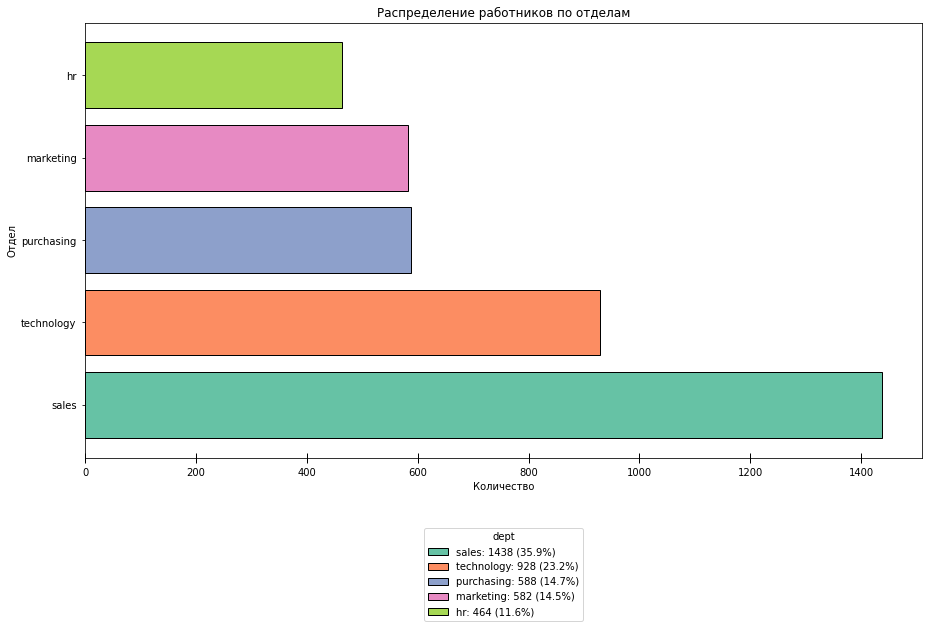

In [37]:
plot_data(train_quit, 'dept', 'Распределение работников по отделам', 'Количество', 'Отдел')

Признак `dept` категориальный. Для подготовки данных потребуется его кодирование Ohe. Важно учитывать дисбаланс классов.

####  Изучим признак `level` в датафрейме **train_quit**.

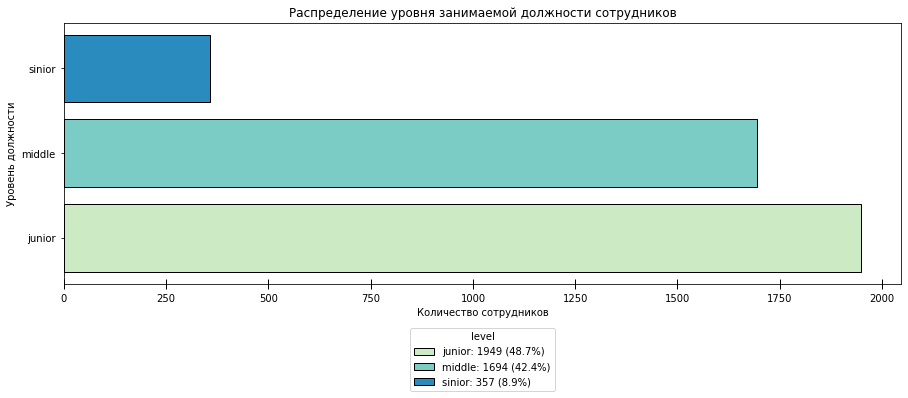

In [38]:
plot_data(train_quit, 'level', 'Распределение уровня занимаемой должности сотрудников', 'Количество сотрудников', 'Уровень должности', palette='GnBu')

`level` так же категориальный признак с дисбалансом классов. Для подготовки данных потребуется его кодирование OrdinalEncoder.

####  Изучим признак `workload` в датафрейме **train_quit**.

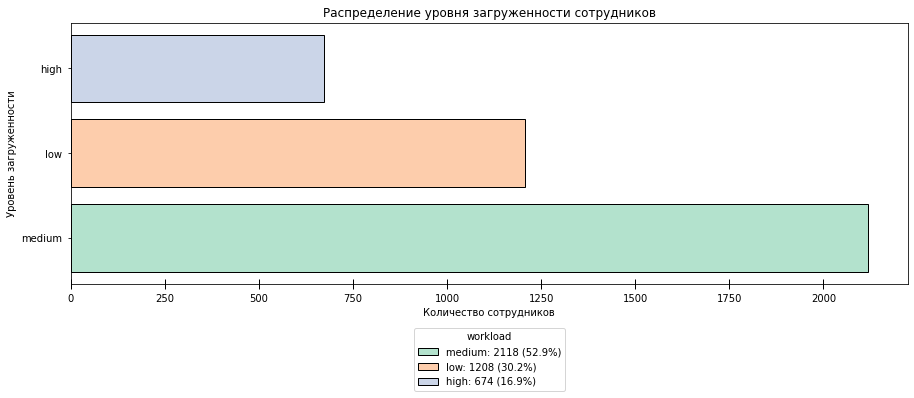

In [39]:
plot_data(train_quit, 'workload', 'Распределение уровня загруженности сотрудников', 'Количество сотрудников', 'Уровень загруженности',palette='Pastel2')

`workload` также категориальный признак с дисбалансом классов. Для подготовки данных потребуется его кодирование OrdinalEncoder.

####  Изучим признак `employment_years` в датафрейме **train_quit**.

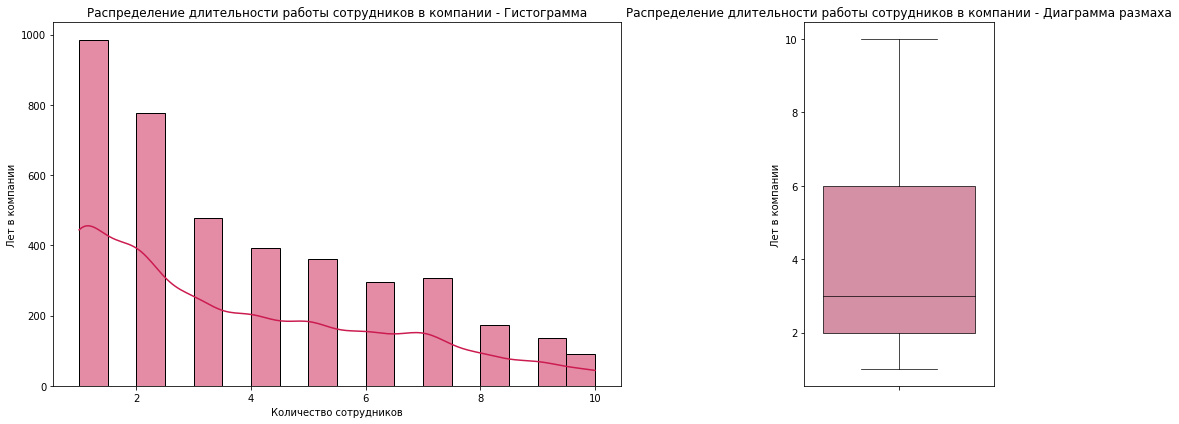

median		3.0
count    4000.000000
mean        3.701500
std         2.541852
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64


In [40]:
plot_data(train_quit, 'employment_years', 'Распределение длительности работы сотрудников в компании', 'Количество сотрудников', 'Лет в компании',  palette='rocket')

`employment_years` числовой дискретный признак, среднее значение ~3.70 года, медиана - 3 года.

####  Изучим признак `last_year_promo` в датафрейме **train_quit**.

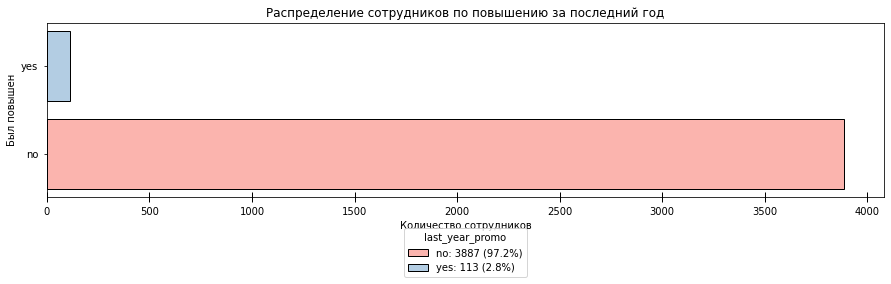

In [41]:
plot_data(train_quit, 'last_year_promo', 'Распределение сотрудников по повышению за последний год', 'Количество сотрудников', 'Был повышен',palette='Pastel1')

`last_year_promo`  бинарный признак. Для подготовки данных потребуется его кодирование OrdinalEncoder. Значительный дисбаланс классов, **97.2%** сотрудников в датасете повышения за последний год не получали.

####  Изучим признак `last_year_violations` в датафрейме **train_quit**.

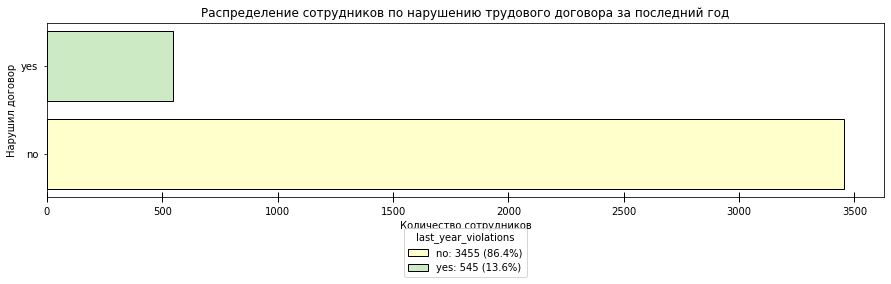

In [42]:
plot_data(train_quit, 'last_year_violations', 'Распределение сотрудников по нарушению трудового договора за последний год', 'Количество сотрудников', 'Нарушил договор',  palette='Pastel1_r')

`last_year_violations` также бинарный признак со значительным дисбалансом классов - **86%** сотрудников в датасете не нарушали трудовой договор.  Для подготовки данных потребуется его кодирование OrdinalEncoder.

####  Изучим признак `supervisor_evaluation` в датафрейме **train_quit**.

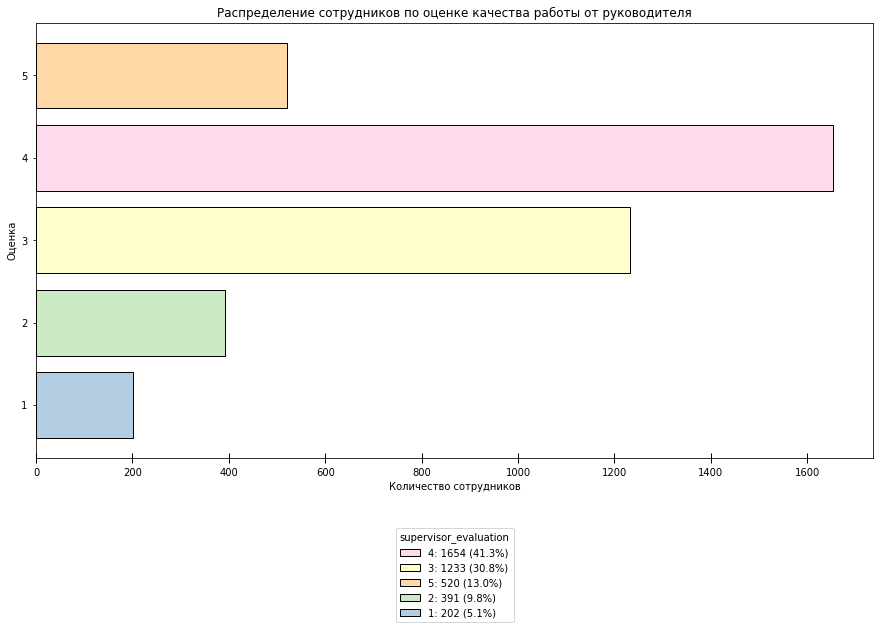

In [43]:
plot_data(train_quit, 'supervisor_evaluation', 'Распределение сотрудников по оценке качества работы от руководителя', 'Количество сотрудников', 'Оценка',  palette='Pastel1_r')

`supervisor_evaluation` числовой дискретный признак, распределение имеет перекос в сторону более высоких оценок.

####  Изучим признак `salary` в датафрейме **train_quit**.

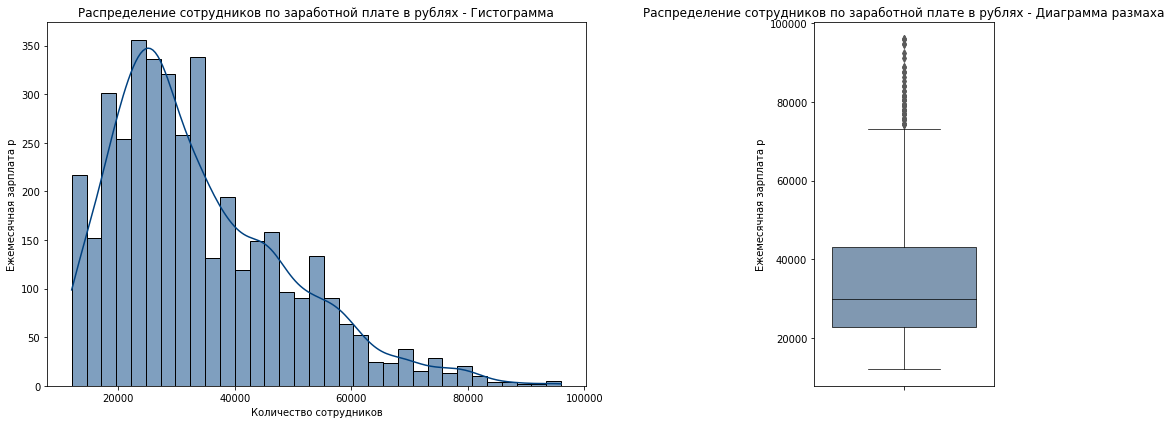

median		30000.0
count     4000.000000
mean     33805.800000
std      15152.415163
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64


In [44]:
plot_data(train_quit, 'salary', 'Распределение сотрудников по заработной плате в рублях', 'Количество сотрудников', 'Ежемесячная зарплата р', palette='ocean')

`salary` числовой признак. Распределение заработной платы смещено влево, что указывает на наличие большего числа сотрудников с относительно низкой зарплатой. Медиана: **30 000** руб, среднее: **33 805.8** руб. При подготовке данных необходимо учитывать выбросы, так как максимальные значения значительно превышают медиану.

####  Изучим признак `quit` в датафрейме **train_quit**.

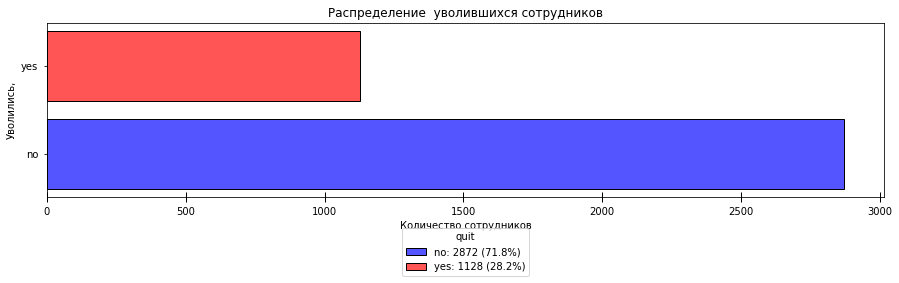

In [45]:
plot_data(train_quit, 'quit', 'Распределение  уволившихся сотрудников', 'Количество сотрудников', 'Уволились,',  palette='seismic')

`quit` - бинарный признак. Он является **целевым**. Медиана: **0.56**, среднее ~ **0.53**.

###  Изучим признак `quit` в датафрейме **test_target_quit**.

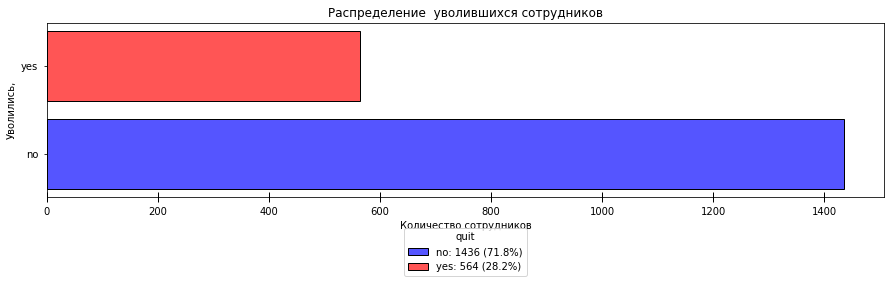

In [46]:
plot_data(test_target_quit, 'quit', 'Распределение  уволившихся сотрудников', 'Количество сотрудников', 'Уволились,', palette='seismic')

Распределение **уволившихся сотрудников** в тестовых данных соответствует распределению в тренировочных данных.

### Выводы.
- Корреляционный анализ показал значимые взаимосвязи между признаками, что может быть полезным при выборе признаков для моделей машинного обучения. Самая сильная корреляция между `job_satisfaction_rate` и `supervisor_evaluation` (0.76). `employment_years` имеет положительную корреляцию с `level` (0.64).
- Дисбаланс классов присутствует во многих категориальных признаках (`dept`, `level`, `workload`, `last_year_promo`, `last_year_violations`), что может повлиять на качество моделей машинного обучения.
- В числовых признаках наблюдаются выбросы и смещения, что также требует внимания при подготовке данных.
- Распределение признаков в тестовых данных соответствует тренировочным, что говорит о схожести выборок и позволяет ожидать адекватную работу модели на тестовой выборке.


##  Подготовка данных.

- Подготовку признаков выполним в пайплайне. Для подготовки данных будем использовать два типа кодировщиков: **OneHotEncoder** для номинальных категориальных признаков и **OrdinalEncoder** для ранговых категориальных признаков. 
- Незначительное количество пропусков в столбцах `dept` и `level` и `workload`. Заполним их на этапе кодирования самым популярным значением.
- Количественные признаки будем масштабировать с помощью **StandardScaler** и **MinMaxScaler**. 


- **Номинальный признак**: 
  - `dept` (отдел)

Будем кодировать **OneHotEncoder**

- **Ранговые признаки**: 
  - `level` (уровень должности)
  - `workload` (уровень загруженности)
  - `last_year_promo` (повышение за последний год)
  - `last_year_violations` (нарушения трудового договора за последний год)
 
Будем кодировать **OrdinalEncoder**

- **Количественные признаки**: 
  - `employment_years` (длительность работы в компании)
  - `supervisor_evaluation` (оценка от руководителя)
  - `salary` (зарплата)
  
Будем масштабировать **StandardScaler** и **MinMaxScaler**.

In [47]:
# Пайплайны для обработки данных
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary']

ohe_pipe = Pipeline([
    ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
])

ord_pipe = Pipeline([
    ('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('ord', OrdinalEncoder(categories=[['junior', 'middle', 'sinior'], ['low', 'medium', 'high']], handle_unknown='use_encoded_value', unknown_value=np.nan)),
    ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
])

data_preprocessor = ColumnTransformer([
    ('ohe', ohe_pipe, ohe_columns),
    ('ord', ord_pipe, ord_columns),
    ('num', StandardScaler(), num_columns)
], remainder='passthrough')

##  Обучение моделей для предсказания уровня удовлетворённости сотрудника.

Обучим в пайплайне две модели - **Линейную регрессию** и **дерево решений**. Лучшую модель с лучшими параметрами найдем с помощью **GridSearchCV** с  кросс-валидацией.
В качестве скоринга будем использовать метрику **SMAPE** (англ. symmetric mean absolute percentage error, «симметричное среднее абсолютное процентное отклонение»).

In [48]:
#Определим функцию, считающую **SMAPE**
def smape(y_true, y_pred):
    """
    Вычисляет значение метрики SMAPE (Symmetric Mean Absolute Percentage Error).
    
    Аргументы:
    y_true (np.array или pd.Series): Фактические значения.
    y_pred (np.array или pd.Series): Предсказанные значения.
    
    Возвращает:
    float: Значение метрики SMAPE.
    """
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return 100 * np.mean(numerator / denominator)


# Создадим метрику SMAPE для оценки модели, где меньшие значения лучше.
smape_scorer = make_scorer(smape, greater_is_better=False)


Для **дерева решения** в качестве *гиперпараметров* используем 

- **models__max_depth**: диапазон значений для максимальной глубины дерева
- **models__min_samples_split**: диапазон значений для минимального количества образцов, необходимых для разделения узла
- **models__max_features**: диапазон значений для максимального количества признаков, используемых при поиске наилучшего разбиения 

Также для обеих моделей в качестве *гиперпараметра* используем **StandardScaler()** (с ним или без изменений).

In [49]:
# Определяем параметры для GridSearchCV
param_grid = [
    {
        'models': [LinearRegression()],  # Модель линейной регрессии
        'preprocessor__num': [StandardScaler(), 'passthrough']  # Масштабирование или без изменений
    },
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],  # Дерево решений
        'models__max_depth': range(2, 21),  # Диапазон глубины дерева
        'models__min_samples_split': range(2, 21),  # Диапазон min_samples_split
        'models__max_features': range(2, 21),  # Диапазон max_features
        'preprocessor__num': [StandardScaler(), 'passthrough']  # Масштабирование или без изменений
    }
]

Объединяем финальный пайплайн.

In [50]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
])

Определим признаки и целевую переменную для обучения.

In [51]:
# Отбрасываем id и определяем признаки (X) 
X_train = job_satisfaction.drop(['id', 'job_satisfaction_rate'], axis=1)
# определяем целевую переменную (y)
y_train = job_satisfaction['job_satisfaction_rate']

Обучим модели на учебных данных. Выведем лучшую модель, ее параметры и скоринг.

In [52]:
# Настраиваем RandomizedSearchCV с кросс-валидацией и метрикой SMAPE
r_search = RandomizedSearchCV(pipe_final, param_grid, n_iter=22, cv=5, scoring=smape_scorer, random_state=RANDOM_STATE, n_jobs=-1)
# Обучаем модели
r_search.fit(X_train, y_train)  # Лучшая модель. Кликабельно.

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pip...
                                         'preprocessor__num': [StandardScaler(),
                                                               'passthrough']},
                                        {'models': [DecisionTreeRegressor(random_state=117)],
                                         'models__max_depth': range(2, 21),
                                         'models__max_features': range(2, 21),
                                         'models__min_samples_split': range(2, 21),
                                         'preprocessor__num': [StandardScaler(),
                                                               'passthrough']}],
                   random_state=117,
                   scoring=make_scorer(smape, greater_is_better=False, response_method='predict'))

In [53]:
# Выведем метрику SMAPE  для лучшей модели
print('Метрика лучшей модели на тренировочной выборке:', round(r_search.best_score_, 2))

Метрика лучшей модели на тренировочной выборке: -14.66


Теперь проверим модель на тестовой выбореке. По условию ТЗ критерий успеха: 

**SMAPE** должен быть не больше 15 *на тестовой выборке.*


In [54]:
# Оценка на тестовой выборке
test_features_merged = test_features.merge(test_target, on='id', how='left')
X_test = test_features_merged.drop(['id', 'job_satisfaction_rate'], axis=1)
y_test = test_features_merged['job_satisfaction_rate']
best_model = r_search.best_estimator_
print(f'Метрика SMAPE лучшей модели по кросс-валидации на обучающих данных: {round(r_search.best_score_*(-1),4)}')
print(f'Метрика SMAPE лучшей модели на тестовой выборке: {round(smape(y_test, best_model.predict(X_test)),4)}')

Метрика SMAPE лучшей модели по кросс-валидации на обучающих данных: 14.6556
Метрика SMAPE лучшей модели на тестовой выборке: 13.7687


**SMAPE** на тестовой выборке ~ 13.8, что меньше 15. Моделирование можно считать успешным.

### Выводы.

На этапе подготовки:

- Категориальные признаки были закодированы в пайплайне с использованием **OneHotEncoder** (для номинальных признаков) и **OrdinalEncoder** (для ранговых признаков).
- Для заполнения пропусков в категориальных признаках использовалось наиболее часто встречающееся значение.
- Количественные признаки масштабированы с помощью StandardScaler и без него.

На этапе обучения моделей:

- Были протестированы две модели машинного обучения: **логистическая регрессия** и **дерево решений**.
- Модели были настроены с использованием кросс-валидации и **GridSearchCV** для выбора наилучших гиперпараметров.
- В качестве метрики оценки модели в соответствии с ТЗ использовалась **SMAPE** (*симметричная средняя абсолютная процентная ошибка*) . Данная метрика позволяет интерпретировать ошибки в процентах и является устойчивой к выбросам.
- В результате работы пайплайна лучшей моделью определено **дерево решений** без масштабирования. Значение **SMAPE** на обучающей выборке: **~14.7**, на тестовой выборке: **~ 13.8**, меньше 15 и подходит под критерий успеха моделирование в ТЗ.


## Внимательнее изучим уволившихся сотрудников.


Изучим закономерности среди уволившихся сотрудников.

### Изучим количество увольнений по отделам.

In [55]:
# Подготовка данных для визуализации
dept_yes = train_quit[train_quit['quit'] == 'yes'].groupby('dept').size().reset_index(name='yes_count')
dept_no = train_quit[train_quit['quit'] == 'no'].groupby('dept').size().reset_index(name='no_count')
dept_analysis = pd.merge(dept_yes, dept_no, on='dept', how='outer').fillna(0)
dept_analysis['total_count'] = dept_analysis['yes_count'] + dept_analysis['no_count'] 

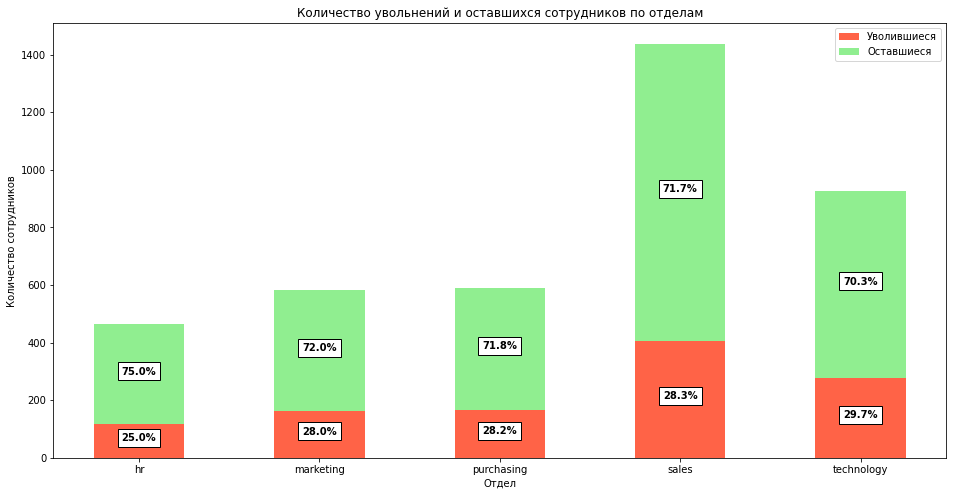

In [56]:
# Построение  графика
x = np.arange(len(dept_analysis['dept']))
bar_width = 0.5
fig, ax = plt.subplots(figsize=(16, 8))
bars1 = ax.bar(x, dept_analysis['yes_count'], bar_width, label='Уволившиеся', color='#FF6347')
bars2 = ax.bar(x, dept_analysis['no_count'], bar_width, bottom=dept_analysis['yes_count'], label='Оставшиеся', color='#90EE90')
for i in range(len(dept_analysis)): # Добавление значений на столбцы с процентами
    yes_percentage = (dept_analysis['yes_count'][i] / dept_analysis['total_count'][i]) * 100
    no_percentage = (dept_analysis['no_count'][i] / dept_analysis['total_count'][i]) * 100
    ax.text(x[i], dept_analysis['yes_count'][i] / 2, f'{yes_percentage:.1f}%', ha='center', color='black', fontweight='bold', bbox=dict(facecolor='white', edgecolor='black'))
    ax.text(x[i], dept_analysis['yes_count'][i] + dept_analysis['no_count'][i] / 2, f'{no_percentage:.1f}%', ha='center', color='black', fontweight='bold', bbox=dict(facecolor='white', edgecolor='black'))
# Подписи 
ax.set_xlabel('Отдел')
ax.set_ylabel('Количество сотрудников')
ax.set_title('Количество увольнений и оставшихся сотрудников по отделам')
ax.set_xticks(x)
ax.set_xticklabels(dept_analysis['dept'])
ax.legend()

plt.show()

In [57]:
for index, row in dept_analysis.iterrows():
    print(f"Всего уволилось из отдела {row['dept']} : {row['yes_count']}")

Всего уволилось из отдела hr : 116
Всего уволилось из отдела marketing : 163
Всего уволилось из отдела purchasing : 166
Всего уволилось из отдела sales : 407
Всего уволилось из отдела technology : 276


- Больше всего людей уволилось из отдела **продаж** - **407** человек, это связано с тем, что больше всего людей в компании работает в продажах.
- Если брать процент ушедших по отделам, то больше всего уходят из **технологического отдела** - **29,7**%. За ним **продажи** с **28.3**%, **закупки** с **28.2**%, **маркетинг** с **28**% и в конце **hr** с **25**%.

### Сравним загруженность уволившихся сотрудников с оставшимися.

Изучим распределение уровня загруженности среди уволившихся сотрудников. Сравним с распределение уровня загруженности среди оставшихся сотрудников.

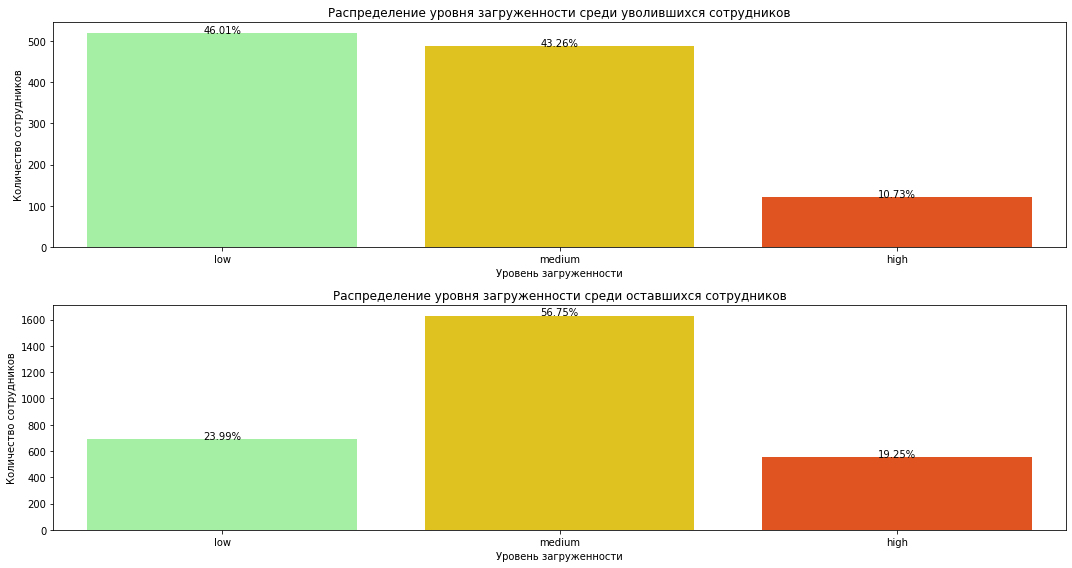

In [58]:
# График распределения уровня загруженности
plt.figure(figsize=(15, 8))
palette = {'low': '#98FB98', 'medium': '#FFD700', 'high': '#FF4500'} # Определение палитры
# График для уволившихся сотрудников
plt.subplot(2, 1, 1)
ax1 = sns.countplot(x='workload', data=train_quit[train_quit['quit'] == 'yes'], palette=palette, order=['low', 'medium', 'high'])
plt.title('Распределение уровня загруженности среди уволившихся сотрудников')
plt.xlabel('Уровень загруженности')
plt.ylabel('Количество сотрудников')
# Добавление процентов на график
total_quit = len(train_quit[train_quit['quit'] == 'yes'])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2., height + 0.1, '{:1.2f}%'.format(height / total_quit * 100), ha="center")
# График для оставшихся сотрудников
plt.subplot(2, 1, 2)
ax2 = sns.countplot(x='workload', data=train_quit[train_quit['quit'] == 'no'], palette=palette, order=['low', 'medium', 'high'])
plt.title('Распределение уровня загруженности среди оставшихся сотрудников')
plt.xlabel('Уровень загруженности')
plt.ylabel('Количество сотрудников')
# Добавление процентов на график
total_no = len(train_quit[train_quit['quit'] == 'no'])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width() / 2., height + 0.1, '{:1.2f}%'.format(height / total_no * 100), ha="center")
plt.tight_layout()
plt.show()


- Видно, что у **уволившихся сотрудников** было больше **низкого** (**46**%) уровеня загруженности, чем у **оставшихся сотрудников** (**24**%).
- Напротив, среди **оставшихся сотрудников** было больше **среднего** и **высокого** (**7**% против **43**% и **19**% против **11**% соответственно) уровня загруженности. 
- То есть, хоть это и кажется контринтуитивным, чем ниже загруженность сотрудника - тем выше шанс на его увольнение.

### Построим портрет уволившегося сотрудника.

Посмотрим, какое значение по каждому признаку среди уволившихся сотрудников наиболее вероятно.

In [59]:
# Находим самое распространенное значение и его процент для каждого признака среди уволившихся сотрудников
most_common_values = {}
percentages = {}

# Отфильтруем только уволившихся сотрудников
quit_data = train_quit[train_quit['quit'] == 'yes']

# Проходимся по каждому столбцу, кроме 'quit' и 'id'
for column in quit_data.columns:
    if column not in ['quit', 'id']:
        if column == 'salary':
            most_common_values[column] = quit_data[column].median()
            percentages[column] = None
        else:
            most_common_value = quit_data[column].mode()[0]
            count = quit_data[column].value_counts()[most_common_value]
            percentage = (count / len(quit_data)) * 100
            
            most_common_values[column] = most_common_value
            percentages[column] = percentage

# Вывод результатов
for column in most_common_values:
    print(f"-Признак: {column}")
    if column == 'salary':
        print(f"Медиана зарплаты: {most_common_values[column]}")
    else:
        print(f"Самое распространенное значение: {most_common_values[column]}")
        print(f"Процент: {percentages[column]:.2f}%")


-Признак: dept
Самое распространенное значение: sales
Процент: 36.08%
-Признак: level
Самое распространенное значение: junior
Процент: 88.92%
-Признак: workload
Самое распространенное значение: low
Процент: 46.01%
-Признак: employment_years
Самое распространенное значение: 1
Процент: 53.10%
-Признак: last_year_promo
Самое распространенное значение: no
Процент: 99.91%
-Признак: last_year_violations
Самое распространенное значение: no
Процент: 79.79%
-Признак: supervisor_evaluation
Самое распространенное значение: 3
Процент: 46.37%
-Признак: salary
Медиана зарплаты: 22800.0


Итак, наиболее вероятный уволившийся сотрудник - это **продажник**, занимающий **младшую** должность, с **низкой** загруженностью, проработавший в компании **1** год. За этот год его **не повышали** и он **не нарушал трудовой договор**. Его оценка от руководителя - **3/5**. Его зарплата - **22800** р.

### Cравним распределения признака `job_satisfaction_rate` для ушедших и оставшихся сотрудников.

Аналитики утверждают, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. Проверим это утверждение. Сравним распределения признака `job_satisfaction_rate` для ушедших и оставшихся сотрудников. 

In [60]:
# Объединяем test_features, test_target и test_target_quit по столбцу 'id'
test_data = pd.merge(test_features, test_target, on='id')
test_data = pd.merge(test_data, test_target_quit, on='id')

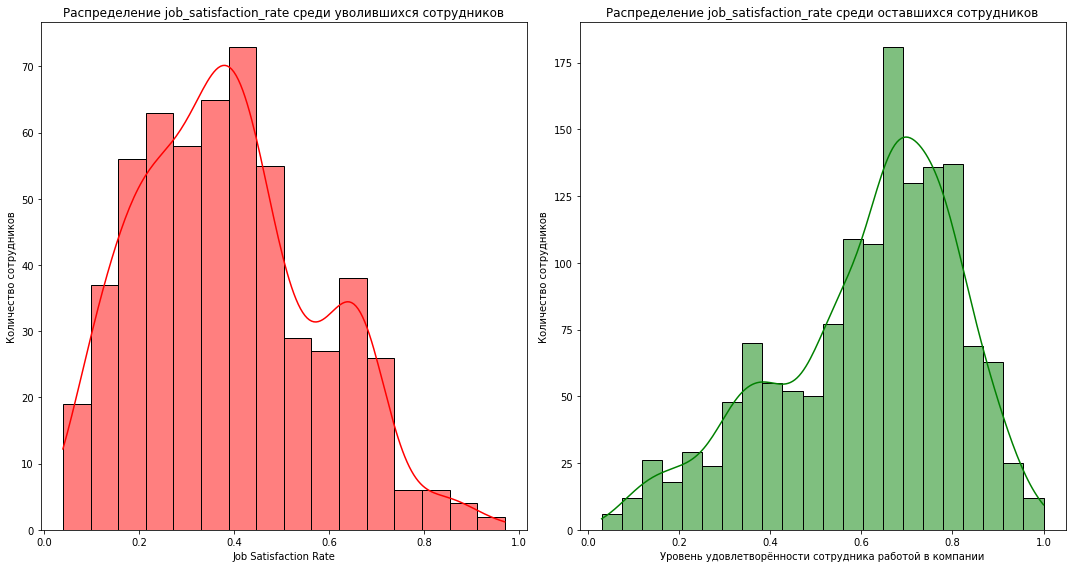

In [61]:
# Построим графики
plt.figure(figsize=(15, 8))
# График для уволившихся сотрудников
plt.subplot(1, 2, 1)
sns.histplot(test_data[test_data['quit'] == 'yes']['job_satisfaction_rate'], kde=True, color='red')
plt.title('Распределение job_satisfaction_rate среди уволившихся сотрудников')
plt.xlabel('Job Satisfaction Rate')
plt.ylabel('Количество сотрудников')
# График для оставшихся сотрудников
plt.subplot(1, 2, 2)
sns.histplot(test_data[test_data['quit'] == 'no']['job_satisfaction_rate'], kde=True, color='green')
plt.title('Распределение job_satisfaction_rate среди оставшихся сотрудников')
plt.xlabel('Уровень удовлетворённости сотрудника работой в компании')
plt.ylabel('Количество сотрудников')

plt.tight_layout()
plt.show()


- Среди уволившихся сотрудников:
  - Распределение имеет пик в районе 0.4.
  - Большая часть уволившихся сотрудников имеет `уровень удовлетворенности работой` ниже 0.5.

- Среди оставшихся сотрудников:
  - Распределение имеет пик в районе 0.6.
  - Большая часть оставшихся сотрудников имеет `уровень удовлетворенности работой` выше 0.5.

Видно, что уволившиеся сотрудники в основном имеют более низкий `уровень удовлетворенности работой` по сравнению с оставшимися сотрудниками. Аналитики правы.

### Выводы.

В ходе изучения уволившихся сотрудников мы увидели:

- Больше всего людей уволилось из отдела **продаж** - **407** человек, но в нем и работает больше всего сотрудников.
- Если брать процент ушедших по отделам, то больше всего уходят из **технологического отдела** - **29,7**%. За ним **продажи** с **28.3**%, **закупки** с **28.2**%, **маркетинг** с **28**% и в конце **hr** с **25**%.
- У **уволившихся сотрудников** было больше **низкого** (**46**%) уровня загруженности, чем у **оставшихся сотрудников** (**24**%), среди **оставшихся сотрудников** было больше **среднего** и **высокого** (**7**% против **43**% и **19**% против **11**% соответственно) уровня загруженности. Т.е. чем ниже загруженность сотрудника - тем выше шанс на его увольнение.
- Самый вероятный уволившийся сотрудник - это **продажник**, занимающий **младшую** должность, с **низкой** загруженностью, проработавший в компании **1** год. За этот год его **не повышали** и он **не нарушал трудовой договор**. Его оценка от руководителя - **3/5**. Его зарплата - **22800** р.
- Мы убедились в утвержддении аналитиков, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. Видно, что уволившиеся сотрудники в основном имеют более низкий `уровень удовлетворенности работой` по сравнению с оставшимися сотрудниками. 

## Обучение модели для предсказания увольнения сотрудника из компании.

Подготовим пайплайн в котором подберем и обучим модель, предсказывающую увольнение сотрудника. Будем использовать **Логистическую регрессию**, **дерево решений** и **k-ближайших соседей**.

Мы убедились, что `job_satisfaction_rate` влияет на `увольнение`. Добавмм в обучающие данные этот признак на основе предсказаний предыдущей модели. 

В качестве скоринга по ТЗ будем использовать метрику **ROC-AUC** - она учитывает как чувствительность, так и специфичность, устойчива к дисбалансу классов и хорошо подходит для задач бинарной классификации. Значение **ROC-AUC** варьируется от 0 до 1, где 1 означает идеальную модель, а 0.5 — модель, не лучше случайного угадывания.

In [62]:
#Добавляем новый признак
test_features['job_satisfaction_rate'] = best_model.predict(test_features)
#Добавим признак в список количественных признаков
num_columns = ['employment_years', 'supervisor_evaluation', 'salary','job_satisfaction_rate' ]
# Объединяем test_target_quit и test_features по столбцу 'id'
all_features = test_target_quit.merge(test_features, on='id') 
# Готовим выборки
train_2 = train_quit.drop(['id'], axis=1) 
test_2 = all_features.drop(['quit', 'id'], axis=1) # Удаляем столбцы 'quit' и 'id' из all_features для тестовых данных
target_2 = all_features['quit'] # Сохраняем столбец 'quit' как целевую переменную для тестовых данных

# Разделяем train_2 на признаки (X_train) и целевую переменную (y_train)
X_train = train_2.drop('quit', axis=1)
y_train = train_2['quit']

# Определяем признаки и целевую переменную для тестовых данных
X_test = test_2
y_test = target_2

# Инициализируем LabelEncoder
label_encoder = LabelEncoder()
# Преобразуем целевую переменную для тренировочных данных
y_train = label_encoder.fit_transform(y_train)
# Преобразуем целевую переменную для тестовых данных
y_test = label_encoder.transform(y_test)

Для **K-ближайших соседей** в качестве *гиперпараметра* используем 

- **models__n_neighbors**: количество соседей.
- **models__weights**: варианты взвешивания соседей.
- **models__algorithm**: алгоритм, используемый для вычисления ближайших соседей.

Для **дерева решения** в качестве *гиперпараметров* используем 

- **models__max_depth**: диапазон значений для максимальной глубины дерева.
- **models__min_samples_split**: диапазон значений для минимального количества образцов, необходимых для разделения узла.
- **models__min_samples_leaf**: диапазон минимального количества образцов в листе.
- **models__max_features**: диапазон максимального количества признаков, используемых при поиске наилучшего разбиения.
- **models__criterion**: критерий для разбиения узлов.

Для **логистической регрессии** в качестве *гиперпараметра* используем 

- **models__C**: регуляризация.
- **models__solver**: алгоритмы оптимизации.
- **models__penalty**: тип регуляризации.


Также для всех моделей в качестве *гиперпараметра* используем **StandardScaler()** (с ним или без изменений).

In [63]:
# Определяем сетку параметров для подбора гиперпараметров
param_grid = [
    {
        # Используем K-ближайших соседей
        'models': [KNeighborsClassifier()],
        # Параметр n_neighbors варьируется от 2 до 10
        'models__n_neighbors': range(2, 11),
        # Преобразование числовых данных: стандартизация или пропуск
        'preprocessor__num': [StandardScaler(), 'passthrough'],
        # Дополнительный параметр weights
        'models__weights': ['uniform', 'distance'],
        # Дополнительный параметр algorithm
        'models__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    {
        # Используем дерево решений
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        # Параметр max_depth варьируется от 2 до 22
        'models__max_depth': range(2, 23),
        # Параметр max_features варьируется от 2 до 22
        'models__max_features': range(2, 23),
        # Преобразование числовых данных: стандартизация или пропуск
        'preprocessor__num': [StandardScaler(), 'passthrough'],
        # Дополнительный параметр min_samples_split
        'models__min_samples_split': range(2, 11),
        # Дополнительный параметр min_samples_leaf
        'models__min_samples_leaf': range(1, 11),
        # Дополнительный параметр criterion
        'models__criterion': ['gini', 'entropy']
    },
    {
        # Используем логистическую регрессию
        'models': [LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)],
        # Параметр C варьируется от 0.01 до 100
        'models__C': [0.01, 0.1, 1, 10, 100],
        # Преобразование числовых данных: стандартизация или пропуск
        'preprocessor__num': [StandardScaler(), 'passthrough'],
        # Дополнительный параметр solver
        'models__solver': ['liblinear', 'saga', 'lbfgs'],
        # Дополнительный параметр penalty
        'models__penalty': ['l1', 'l2', 'elasticnet', 'none']
    }
]

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>

При использовании моделей (кроме линейной регрессии) важно настроить параметр `random_state`, чтобы результаты работы над проектом были воспроизводимы при его перезапуске 

<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Исправил, учел, запомнил.

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

Обучим модели на учебных данных. Выведем лучшую модель, ее параметры и скоринг.

In [64]:
# Выбор лучшей модели и параметров с помощью RandomizedSearchCV
r_search = RandomizedSearchCV(pipe_final, param_grid, cv=5, scoring='roc_auc', random_state=RANDOM_STATE, n_jobs=-1)
r_search.fit(X_train, y_train) # Лучшая модель. Кликабельно.

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pip...
                                         'models__min_samples_split': range(2, 11),
                                         'preprocessor__num': [StandardScaler(),
                                                               'passthrough']},
                                        {'models': [LogisticRegression(max_iter=1000,
                                                                       random_state=117)],
                                         'models__C': [0.01, 0.1, 1, 10, 100],
                                         'models__penalty': ['l1', 'l2',
                                                             'elasticnet',
                                                             'none'],
                                         'models__solver': ['liblinear', 'saga',
                                                            'lbfgs'],
                                         'preprocessor__num': [StandardScaler(),
                                                               'passthrough']}],
                   random_state=117, scoring='roc_auc')

Победила **DecisionTreeClassifier**.

In [65]:
# Выведем метрику ROC-AUC  для лучшей модели
print ('Метрика ROC-AUC лучшей модели на тренировочной выборке:', round(r_search.best_score_, 4))

best_model = r_search.best_estimator_
print(f'Метрика ROC-AUC лучшей модели по кросс-валидации на обучающих данных: {round(r_search.best_score_,4)}')

Метрика ROC-AUC лучшей модели на тренировочной выборке: 0.9269
Метрика ROC-AUC лучшей модели по кросс-валидации на обучающих данных: 0.9269


Теперь проверим модель на тестовой выбореке. По условию ТЗ критерий успеха: 

**ROC-AUC** должен быть не меньше **0.91** *на тестовой выборке.*

In [67]:
print(f'Метрика ROC-AUC лучшей модели на тестовой выборке: {round(roc_auc_score(y_test, r_search.predict_proba(X_test)[:, 1]),4)}')

Метрика ROC-AUC лучшей модели на тестовой выборке: 0.9201


**ROC-AUC** на тестовой выборке ~ **0.92**, что больше **0.91**. Моделирование можно считать успешным.

### Выводы.

На этапе подготовки:

- В данные был добавлен новый признак `job_satisfaction_rate`, который показал свою значимость в предыдущем шаге.
- Признаки были подготовлены с помощью уже созданного пайплайна.
- Целевая переменная была преобразована с использованием **LabelEncoder**.

На этапе подбора гиперпараметров и обучения моделей:

- Были протестированы три модели машинного обучения: K-ближайших соседей (**KNeighborsClassifier**), дерево решений (**DecisionTreeClassifier**) и логистическая регрессия (**LogisticRegression**).
- Модели были настроены с использованием **RandomizedSearchCV** для выбора наилучших гиперпараметров с применением кросс-валидации.
- В качестве метрики оценки моделей  по ТЗ использовалась **ROC-AUC**, которая учитывает как чувствительность, так и специфичность, и является устойчивой к дисбалансу классов.

В результате работы пайплайна лучшей моделью оказалась **DecisionTreeClassifier**, который показал наилучшие результаты на кросс-валидации - метрика **ROC-AUC** на тренировочной выборке составила **0.9264**.
На тестовой выборке  **ROC-AUC** составила **0.9194**, что выше требуемого значения **0.91**, указанного в ТЗ.

Дерево решений продемонстрировало высокую гибкость и способность адаптироваться к различным взаимодействиям признаков, что позволило добиться высокого качества модели.

## Общий вывод


**Описание задачи**
- Нам предоставили данные с характеристиками сотрудников. Наша задача — построить модели для предсказания уровня удовлетворенности сотрудников и вероятности их увольнения.

**Исходные данные и проведённая предобработка**
- Для исследования использовались данные из таблиц **train_job_satisfaction_rate.csv**, **test_features.csv**, **test_target_job_satisfaction_rate.csv**, **train_quit.csv**,**test_target_quit.csv**.
- Пропуски в данных были заполнены на этапе кодировки в пайплайне. Категориальные признаки закодированы с использованием **OneHotEncoder** и **OrdinalEncoder**, количественные признаки масштабированы с помощью **StandardScaler**.

**Исследовательский анализ данных**
- Корреляционный анализ показал значимые взаимосвязи между признаками, что полезно при выборе признаков для моделей машинного обучения. Наиболее сильная корреляция между `job_satisfaction_rate` и `supervisor_evaluation` (0.69).
- Были выявлены дисбалансы классов во многих категориальных признаках, такие как `dept`, `level`, `workload`, `last_year_promo`, `last_year_violations`.

**Обучение моделей для предсказания уровня удовлетворенности**
- Были обучены модели **линейной регрессии** и **дерева решений**. Лучшая модель выбрана с помощью **RandomizedSearchCV**.
- В качестве метрики использовалась **SMAPE**. 
- Лучшей моделью оказалось **дерево решений** без масштабирования. Значение **SMAPE** на тестовой выборке составило ~**13.8**, что меньше критерия в **15**, указанного в ТЗ.

**Анализ увольнений сотрудников**
- Уволившиеся сотрудники чаще имели низкий уровень загруженности и более низкий уровень удовлетворенности работой.
- Портрет уволившегося сотрудника: сотрудник отдела продаж, младшая должность, низкая загруженность, 1 год работы, без повышения, оценка от руководителя 3/5, зарплата 22800 рублей.

**Обучение модели для предсказания увольнений**
- Включили предсказания `job_satisfaction_rate` в данные для обучения модели предсказания увольнений.
- Были обучены модели **K-ближайших соседей**, **дерево решений** и **логистическая регрессия**. Лучшая модель выбрана с помощью **RandomizedSearchCV**.
- В качестве метрики использовалась **ROC-AUC**. Лучшей моделью оказался **DecisionTreeClassifier**. Значение **ROC-AUC** на тестовой выборке составило ~**0.92**, что выше критерия **0.91**, указанного в ТЗ.

### Выводы и предложения для бизнеса.


**Выводы:**
- **Корреляционные зависимости**: Сильная корреляция между уровнем удовлетворенности работой и оценкой от руководителя указывает на значимость оценки в формировании общего уровня удовлетворенности сотрудников.
- **Значимость загруженности**: Низкая загруженность сотрудников повышает вероятность их увольнения. Это контринтуитивный, но важный вывод для формирования рабочих нагрузок.
- **Профиль уволившихся сотрудников**: Сотрудники отдела продаж на младших должностях с низкой загруженностью и средней оценкой от руководителя имеют высокую вероятность увольнения.
- **Модели предсказания**: Построенные модели успешно предсказывают как уровень удовлетворенности, так и вероятность увольнения, что позволяет использовать их в реальных бизнес-процессах.

**Дополнительные предложения для бизнеса:**
- **Оптимизация рабочих нагрузок**: Пересмотреть распределение задач и рабочих нагрузок среди сотрудников. Избегать как слишком высокой, так и слишком низкой загруженности для повышения удержания персонала.
- **Повышение уровня удовлетворенности**: Ввести регулярные опросы удовлетворенности и улучшить коммуникацию между сотрудниками и руководителями. Особое внимание уделить сотрудникам с низкими оценками от руководителей.
- **Профессиональное развитие и повышение**: Разработать программы карьерного роста и профессионального развития для младших сотрудников. Чёткие критерии и прозрачность в вопросах повышения могут повысить удовлетворенность и снизить текучесть кадров.
- **Анализ технического отдела и отдела продаж**: Провести углубленный анализ технического отдела и отдела продаж, так как они показали наибольшую текучесть. Возможно, требуется пересмотреть систему мотивации и поддержки сотрудников в этих отделах.
- **Моделирование сценариев**: Использовать предсказательные модели для проведения сценарного анализа. Определять группы риска и разрабатывать превентивные меры для снижения вероятности увольнения сотрудников.
- **Оценка руководителей**: Внедрить систему оценки и обучения руководителей, так как их оценка существенно влияет на удовлетворенность сотрудников. Улучшение навыков управления и коммуникации у руководителей может повысить общую удовлетворенность в коллективе.

Эти рекомендации помогут бизнесу не только удерживать ценных сотрудников, но и создавать благоприятную рабочую среду, что в конечном итоге положительно скажется на его общей производительности и устойчивости.